In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yaml
import os 
import tqdm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
sns.set_theme(style="white", context="talk", palette="muted")
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 14,         
    'axes.titlesize': 15,
    'axes.labelsize': 13,    
    'legend.fontsize': 11,   
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.dpi': 100
})

In [3]:
# Read config_segbana.yaml
with open('../configs/config_segbana.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

# extract data params
data_params = config['data_params']

### Read the csv file

In [4]:
dataset_path = data_params['data_path'] + 'raw/' + data_params['dataset']
data = pd.read_csv(dataset_path)  
data.head(7)

,DATE,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,Moving_Sum_6,SPI6
0,31/1/1981,98.13,21.57,43.12,53.31,2.24,0.53,NaN,NaN,0.00,NaN,NaN,NaN
1,28/2/1981,97.94,25.87,34.75,74.88,2.15,0.49,NaN,NaN,0.00,NaN,NaN,NaN
2,31/3/1981,97.86,29.33,42.81,131.75,2.00,0.46,NaN,NaN,5.27,NaN,NaN,NaN
3,30/4/1981,97.76,30.55,53.50,206.38,2.55,0.45,NaN,NaN,47.46,NaN,NaN,NaN
4,31/5/1981,97.93,28.35,70.00,222.00,2.36,0.45,NaN,NaN,84.38,NaN,NaN,NaN
5,30/6/1981,98.09,27.91,71.31,213.81,2.27,0.47,NaN,NaN,179.30,NaN,316.41,-0.435817
6,31/7/1981,98.13,25.41,82.81,226.06,2.05,0.55,NaN,NaN,258.40,NaN,574.81,0.363602


In [5]:
data.columns

Index(['DATE', 'PS', 'T2M', 'RH2M', 'WD2M', 'WS2M', 'GWETPROF', 'CLOUD_AMT',
       'TOA_SW_DWN', 'PRECTOTCORR_SUM', 'ALLSKY_SFC_SW_DWN', 'Moving_Sum_6',
       'SPI6'],
      dtype='object')

In [6]:
# Ensure the date column is a datetime
data['DATE'] = pd.to_datetime(data['DATE'], dayfirst=True)

# Set the date column as the index and drop it from the columns
data = data.set_index('DATE')

data

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,Moving_Sum_6,SPI6
DATE,,,,,,,,,,,,
1981-01-31,98.13,21.57,43.12,53.31,2.24,0.53,NaN,NaN,0.00,NaN,NaN,NaN
1981-02-28,97.94,25.87,34.75,74.88,2.15,0.49,NaN,NaN,0.00,NaN,NaN,NaN
1981-03-31,97.86,29.33,42.81,131.75,2.00,0.46,NaN,NaN,5.27,NaN,NaN,NaN
1981-04-30,97.76,30.55,53.50,206.38,2.55,0.45,NaN,NaN,47.46,NaN,NaN,NaN
1981-05-31,97.93,28.35,70.00,222.00,2.36,0.45,NaN,NaN,84.38,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,98.14,25.28,86.62,228.44,1.54,0.59,79.40,37.45,367.28,17.32,755.66,0.923103
2021-09-30,98.11,25.80,84.38,196.62,1.30,0.70,63.72,36.71,183.22,18.96,938.88,1.489936
2021-10-31,98.01,26.95,75.81,138.25,1.27,0.67,39.91,34.57,47.26,22.29,977.69,1.610003


In [7]:
# Delete the 'Moving_Sum_6' column (it is not a variable but just serve to compute SPI6)
data = data.drop(columns='Moving_Sum_6', axis=1)
data

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6
DATE,,,,,,,,,,,
1981-01-31,98.13,21.57,43.12,53.31,2.24,0.53,NaN,NaN,0.00,NaN,NaN
1981-02-28,97.94,25.87,34.75,74.88,2.15,0.49,NaN,NaN,0.00,NaN,NaN
1981-03-31,97.86,29.33,42.81,131.75,2.00,0.46,NaN,NaN,5.27,NaN,NaN
1981-04-30,97.76,30.55,53.50,206.38,2.55,0.45,NaN,NaN,47.46,NaN,NaN
1981-05-31,97.93,28.35,70.00,222.00,2.36,0.45,NaN,NaN,84.38,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,98.14,25.28,86.62,228.44,1.54,0.59,79.40,37.45,367.28,17.32,0.923103
2021-09-30,98.11,25.80,84.38,196.62,1.30,0.70,63.72,36.71,183.22,18.96,1.489936
2021-10-31,98.01,26.95,75.81,138.25,1.27,0.67,39.91,34.57,47.26,22.29,1.610003


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 492 entries, 1981-01-31 to 2021-12-31
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PS                 492 non-null    float64
 1   T2M                492 non-null    float64
 2   RH2M               492 non-null    float64
 3   WD2M               492 non-null    float64
 4   WS2M               492 non-null    float64
 5   GWETPROF           492 non-null    float64
 6   CLOUD_AMT          456 non-null    float64
 7   TOA_SW_DWN         456 non-null    float64
 8   PRECTOTCORR_SUM    492 non-null    float64
 9   ALLSKY_SFC_SW_DWN  456 non-null    float64
 10  SPI6               487 non-null    float64
dtypes: float64(11)
memory usage: 46.1 KB


In [9]:
data.describe()

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,456.000000,456.000000,492.000000,456.000000,4.870000e+02
mean,97.998374,27.125955,57.472154,155.276545,2.041565,0.495407,48.398377,35.247215,75.804472,20.241623,1.531971e-16
std,0.146591,2.670033,20.336992,65.668755,0.455758,0.079829,20.170750,2.661185,94.833367,1.587112,1.000000e+00
min,97.550000,20.520000,18.000000,20.940000,1.180000,0.400000,5.240000,30.230000,0.000000,15.650000,-1.414703e+00
25%,97.900000,25.467500,39.732500,82.452500,1.660000,0.430000,29.790000,33.455000,0.000000,19.197500,-9.415795e-01
50%,98.030000,26.370000,58.065000,189.405000,2.020000,0.475000,53.590000,36.680000,26.370000,20.345000,2.097198e-02
75%,98.100000,29.135000,77.782500,212.152500,2.410000,0.540000,65.235000,37.357500,147.660000,21.362500,8.775014e-01
max,98.430000,33.900000,86.880000,289.310000,3.390000,0.790000,81.950000,37.880000,421.880000,24.480000,2.305009e+00


In [10]:
data.isnull().sum()

PS                    0
T2M                   0
RH2M                  0
WD2M                  0
WS2M                  0
GWETPROF              0
CLOUD_AMT            36
TOA_SW_DWN           36
PRECTOTCORR_SUM       0
ALLSKY_SFC_SW_DWN    36
SPI6                  5
dtype: int64

In [16]:
data.isnull().sum()/len(data)*100

PS                   0.000000
T2M                  0.000000
RH2M                 0.000000
WD2M                 0.000000
WS2M                 0.000000
GWETPROF             0.000000
CLOUD_AMT            7.317073
TOA_SW_DWN           7.317073
PRECTOTCORR_SUM      0.000000
ALLSKY_SFC_SW_DWN    7.317073
SPI6                 1.016260
dtype: float64

The target variable presents 5 missing entries, and covariates CLOUD_AMT,  TOA_SW_DWN, and ALLSKY_SFC_SW_DWN have respectively 36 missing values ($\textbf{7.317\%}$) of the total. They will be all removed to avoid noise, additional bias, and perturbation.

### Remove (CLOUD_AMT,  TOA_SW_DWN, and ALLSKY_SFC_SW_DWN) covariates and first five entries of the dataset

In [17]:
data[:7]

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6
DATE,,,,,,,,,,,
1981-01-31,98.13,21.57,43.12,53.31,2.24,0.53,NaN,NaN,0.00,NaN,NaN
1981-02-28,97.94,25.87,34.75,74.88,2.15,0.49,NaN,NaN,0.00,NaN,NaN
1981-03-31,97.86,29.33,42.81,131.75,2.00,0.46,NaN,NaN,5.27,NaN,NaN
1981-04-30,97.76,30.55,53.50,206.38,2.55,0.45,NaN,NaN,47.46,NaN,NaN
1981-05-31,97.93,28.35,70.00,222.00,2.36,0.45,NaN,NaN,84.38,NaN,NaN
1981-06-30,98.09,27.91,71.31,213.81,2.27,0.47,NaN,NaN,179.30,NaN,-0.435817
1981-07-31,98.13,25.41,82.81,226.06,2.05,0.55,NaN,NaN,258.40,NaN,0.363602


In [18]:
COLUMNS_TO_REMOVE = ['CLOUD_AMT', 'TOA_SW_DWN', 'ALLSKY_SFC_SW_DWN']
data = data.drop(columns=COLUMNS_TO_REMOVE, axis=1).dropna()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 487 entries, 1981-06-30 to 2021-12-31
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PS               487 non-null    float64
 1   T2M              487 non-null    float64
 2   RH2M             487 non-null    float64
 3   WD2M             487 non-null    float64
 4   WS2M             487 non-null    float64
 5   GWETPROF         487 non-null    float64
 6   PRECTOTCORR_SUM  487 non-null    float64
 7   SPI6             487 non-null    float64
dtypes: float64(8)
memory usage: 34.2 KB


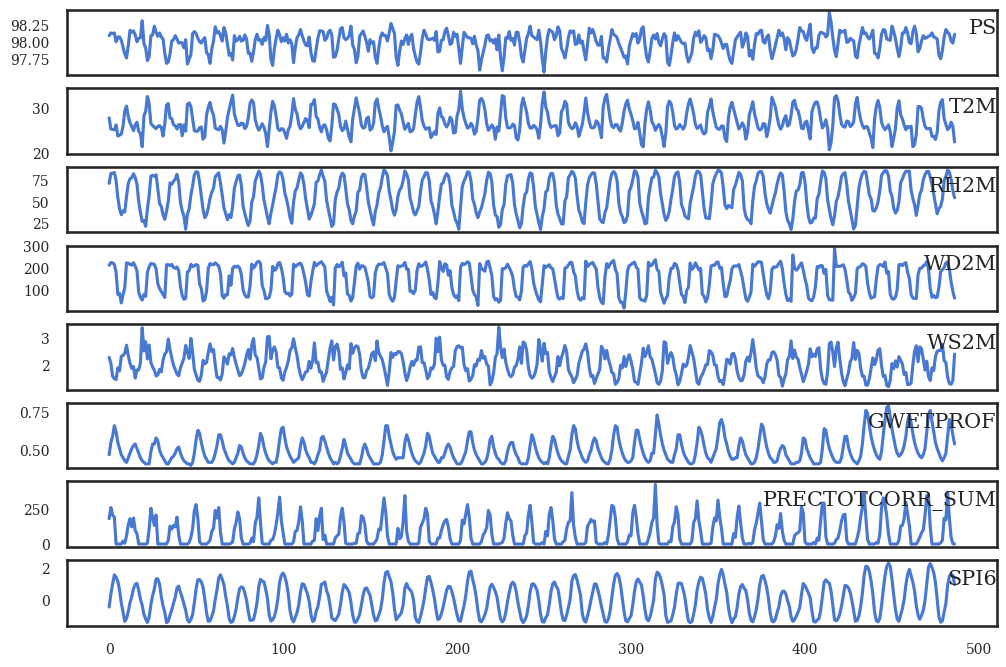

In [20]:
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6, 7]
i = 1
# plot each columnaq
plt.figure(figsize=(12,8))
for group in groups:
 plt.subplot(len(groups), 1, i)
 plt.plot(data.values[:, group])
 plt.title(data.columns[group], y=0.5, loc='right')
 i += 1
plt.show()

#### Normalization
 The scale of the features are big comparatively to the target SPI6. Let's normalize those features 

In [21]:
target_column = 'SPI6'

In [22]:
feature_range = (-1, 1)

# Separate the target column from the other columns
features = data.drop(columns=[target_column])
target = data[target_column]

# Initialize and fit scaler on train data if needed
scaler_type = data_params['scaling_type']
if scaler_type == 'minmax':
    scaler = MinMaxScaler(feature_range=feature_range)
elif scaler_type == 'standard':
    scaler = StandardScaler()
elif scaler_type == 'none':
    scaler = None
else:
    raise ValueError(f"Unsupported scaler_type: {scaler_type}")

normalized_features = scaler.fit_transform(features)

# Convert the normalized features back to a DataFrame
normalized_features_df = pd.DataFrame(normalized_features, columns=features.columns, index=data.index)

# Reconstruct the DataFrame with the normalized columns and the target column
normalized_data = pd.concat([normalized_features_df, target], axis=1)

# Display the head of the new DataFrame
normalized_data.head()

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,PRECTOTCORR_SUM,SPI6
DATE,,,,,,,,
1981-06-30,0.227273,0.104634,0.547909,0.437344,-0.013575,-0.641026,-0.149995,-0.435817
1981-07-31,0.318182,-0.269058,0.881823,0.528636,-0.212670,-0.230769,0.224993,0.363602
1981-08-31,0.295455,-0.281016,0.892857,0.519320,-0.647059,-0.025641,-0.025031,0.999858
1981-09-30,0.318182,-0.294469,0.909117,0.467154,-0.728507,0.333333,-0.100028,1.570868
1981-10-31,0.022727,-0.130045,0.640534,0.206841,-0.755656,0.128205,-1.000000,1.424039


In [23]:
normalized_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 487 entries, 1981-06-30 to 2021-12-31
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PS               487 non-null    float64
 1   T2M              487 non-null    float64
 2   RH2M             487 non-null    float64
 3   WD2M             487 non-null    float64
 4   WS2M             487 non-null    float64
 5   GWETPROF         487 non-null    float64
 6   PRECTOTCORR_SUM  487 non-null    float64
 7   SPI6             487 non-null    float64
dtypes: float64(8)
memory usage: 34.2 KB


### Pearson Correlation

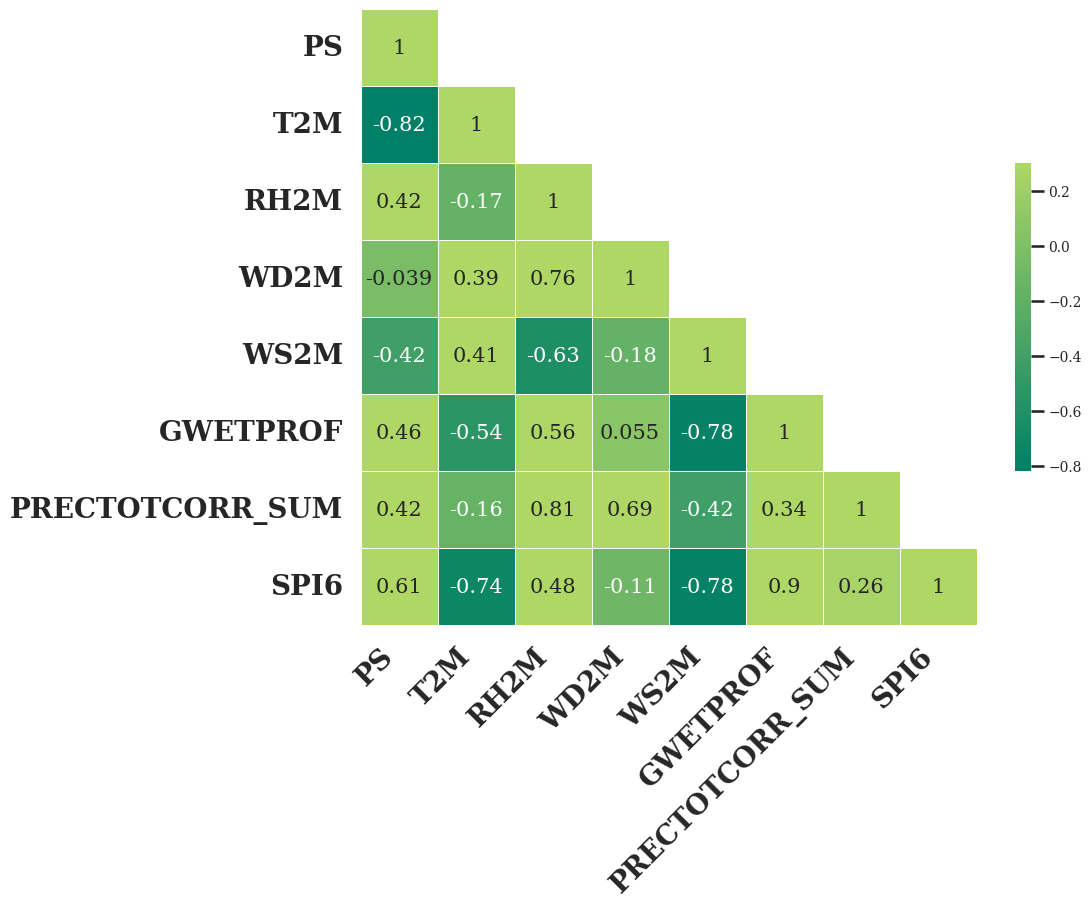

In [24]:
# Compute the correlation matrix
corr = normalized_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))
# plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap = 'summer'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size":15})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=20, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(),fontsize=20, fontweight='bold')
plt.savefig('correlation_heatmap_segbana')

#### Let's focus on the corelations between each variable and target variable

In [25]:
correlations_data = normalized_data.corr()[target_column].sort_values(ascending=False)
correlations_data

SPI6               1.000000
GWETPROF           0.904813
PS                 0.605189
RH2M               0.475414
PRECTOTCORR_SUM    0.260500
WD2M              -0.107865
T2M               -0.735824
WS2M              -0.784149
Name: SPI6, dtype: float64

In [26]:
correlations_data = np.abs(normalized_data.corr()[target_column]).sort_values(ascending=False)
correlations_data

SPI6               1.000000
GWETPROF           0.904813
WS2M               0.784149
T2M                0.735824
PS                 0.605189
RH2M               0.475414
PRECTOTCORR_SUM    0.260500
WD2M               0.107865
Name: SPI6, dtype: float64

In [27]:
no_lagged_data_path = data_params['data_path'] + 'no_lagged/' + data_params['city'] + '_no_lagged.csv'
normalized_data.to_csv(no_lagged_data_path)

In [28]:
normalized_data

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,PRECTOTCORR_SUM,SPI6
DATE,,,,,,,,
1981-06-30,0.227273,0.104634,0.547909,0.437344,-0.013575,-0.641026,-0.149995,-0.435817
1981-07-31,0.318182,-0.269058,0.881823,0.528636,-0.212670,-0.230769,0.224993,0.363602
1981-08-31,0.295455,-0.281016,0.892857,0.519320,-0.647059,-0.025641,-0.025031,0.999858
1981-09-30,0.318182,-0.294469,0.909117,0.467154,-0.728507,0.333333,-0.100028,1.570868
1981-10-31,0.022727,-0.130045,0.640534,0.206841,-0.755656,0.128205,-1.000000,1.424039
...,...,...,...,...,...,...,...,...
2021-08-31,0.340909,-0.288490,0.992451,0.546373,-0.674208,-0.025641,0.741159,0.923103
2021-09-30,0.272727,-0.210762,0.927410,0.309237,-0.891403,0.538462,-0.131412,1.489936
2021-10-31,0.045455,-0.038864,0.678571,-0.125759,-0.918552,0.384615,-0.775955,1.610003


### Transform dataset for Time series forecasting

In [29]:
import sys
sys.path.append('../')

from models.utils import create_lagged_features

2025-08-04 22:41:34.544579: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-04 22:41:34.568549: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-04 22:41:34.606664: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-04 22:41:34.606731: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-04 22:41:34.630004: I tensorflow/core/platform/cpu_feature_gua

In [30]:
col_names = list(normalized_data.columns)
print(col_names)

['PS', 'T2M', 'RH2M', 'WD2M', 'WS2M', 'GWETPROF', 'PRECTOTCORR_SUM', 'SPI6']


In [31]:
lagged_selected_columns = ['SPI6(t)']

In [32]:
lagged_data = create_lagged_features(data= normalized_data, 
                                      col_names=col_names,
                                      n_in=data_params['window_size'],
                                      n_out=data_params['n_output_steps'],
                                      dropnan=True)

lagged_data.head()

,PS(t-5),T2M(t-5),RH2M(t-5),WD2M(t-5),WS2M(t-5),GWETPROF(t-5),PRECTOTCORR_SUM(t-5),SPI6(t-5),PS(t-4),T2M(t-4),...,PRECTOTCORR_SUM(t-1),SPI6(t-1),PS(t),T2M(t),RH2M(t),WD2M(t),WS2M(t),GWETPROF(t),PRECTOTCORR_SUM(t),SPI6(t)
DATE,,,,,,,,,,,,,,,,,,,,,
1981-11-30,0.227273,0.104634,0.547909,0.437344,-0.013575,-0.641026,-0.149995,-0.435817,0.318182,-0.269058,...,-1.000000,1.424039,0.181818,-0.503737,0.059814,-0.541230,-0.366516,-0.230769,-1.000000,1.162991
1981-12-31,0.318182,-0.269058,0.881823,0.528636,-0.212670,-0.230769,0.224993,0.363602,0.295455,-0.281016,...,-1.000000,1.162991,0.181818,-0.473842,-0.306620,-0.506800,-0.466063,-0.435897,-1.000000,0.608285
1982-01-31,0.295455,-0.281016,0.892857,0.519320,-0.647059,-0.025641,-0.025031,0.999858,0.318182,-0.294469,...,-1.000000,0.608285,0.068182,-0.437967,-0.504646,-0.828148,0.022624,-0.641026,-1.000000,-0.191134
1982-02-28,0.318182,-0.294469,0.909117,0.467154,-0.728507,0.333333,-0.100028,1.570868,0.022727,-0.130045,...,-1.000000,-0.191134,-0.159091,-0.168909,-0.375726,-0.546820,0.049774,-0.743590,-0.900019,-0.762143
1982-03-31,0.022727,-0.130045,0.640534,0.206841,-0.755656,0.128205,-1.000000,1.424039,0.181818,-0.503737,...,-0.900019,-0.762143,-0.386364,0.339312,-0.412021,-0.311100,0.131222,-0.846154,-0.975017,-1.333153


### Now we have 48 columns. Lets reduce them

### Select the most useful lags. 

Let's plot correlation matrice by including for each the target TWS and others with a  given lag_lenth

In [33]:
normalized_data.columns

Index(['PS', 'T2M', 'RH2M', 'WD2M', 'WS2M', 'GWETPROF', 'PRECTOTCORR_SUM',
       'SPI6'],
      dtype='object')

In [34]:
lagged_data.columns

Index(['PS(t-5)', 'T2M(t-5)', 'RH2M(t-5)', 'WD2M(t-5)', 'WS2M(t-5)',
       'GWETPROF(t-5)', 'PRECTOTCORR_SUM(t-5)', 'SPI6(t-5)', 'PS(t-4)',
       'T2M(t-4)', 'RH2M(t-4)', 'WD2M(t-4)', 'WS2M(t-4)', 'GWETPROF(t-4)',
       'PRECTOTCORR_SUM(t-4)', 'SPI6(t-4)', 'PS(t-3)', 'T2M(t-3)', 'RH2M(t-3)',
       'WD2M(t-3)', 'WS2M(t-3)', 'GWETPROF(t-3)', 'PRECTOTCORR_SUM(t-3)',
       'SPI6(t-3)', 'PS(t-2)', 'T2M(t-2)', 'RH2M(t-2)', 'WD2M(t-2)',
       'WS2M(t-2)', 'GWETPROF(t-2)', 'PRECTOTCORR_SUM(t-2)', 'SPI6(t-2)',
       'PS(t-1)', 'T2M(t-1)', 'RH2M(t-1)', 'WD2M(t-1)', 'WS2M(t-1)',
       'GWETPROF(t-1)', 'PRECTOTCORR_SUM(t-1)', 'SPI6(t-1)', 'PS(t)', 'T2M(t)',
       'RH2M(t)', 'WD2M(t)', 'WS2M(t)', 'GWETPROF(t)', 'PRECTOTCORR_SUM(t)',
       'SPI6(t)'],
      dtype='object')

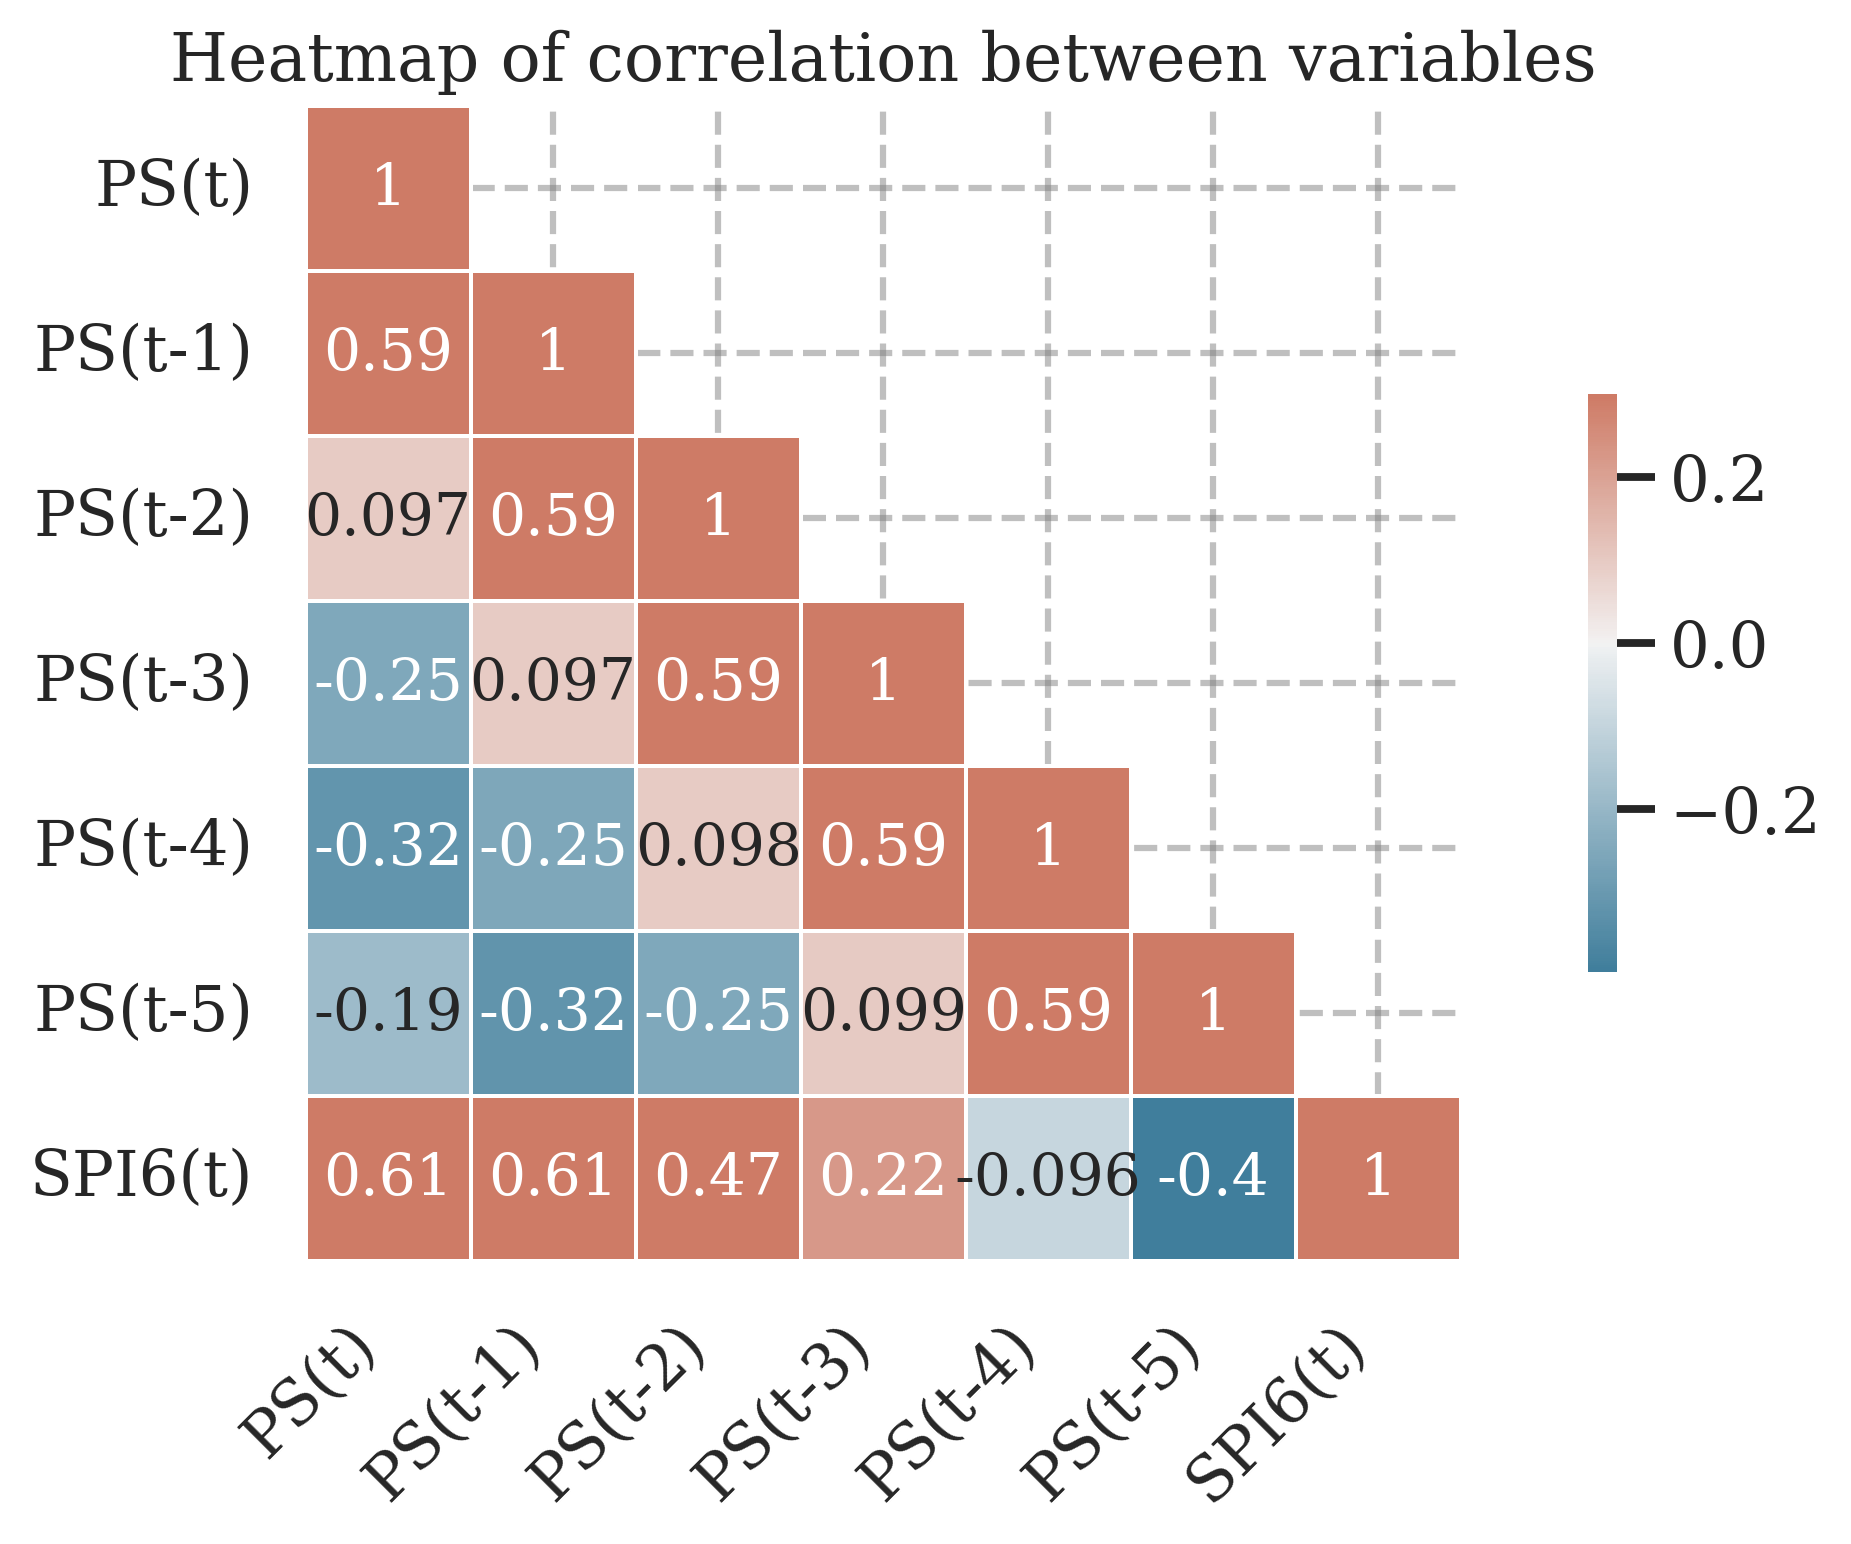

In [35]:
# Compute the correlation matrix : SPI6 and lag PS 

dfm1 = lagged_data[['PS(t)','PS(t-1)', 'PS(t-2)', 'PS(t-3)','PS(t-4)', 'PS(t-5)','SPI6(t)']]

corr = dfm1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [36]:
np.abs(dfm1.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)    1.000000
PS(t-1)    0.610156
PS(t)      0.605743
PS(t-2)    0.474091
PS(t-5)    0.395897
PS(t-3)    0.223347
PS(t-4)    0.095874
Name: SPI6(t), dtype: float64

#####  The lag 1 : PS(t-1) is the most correlated. So, we only keep it.

In [37]:
lagged_selected_columns.append('PS(t-1)')

In [38]:
lagged_selected_columns

['SPI6(t)', 'PS(t-1)']

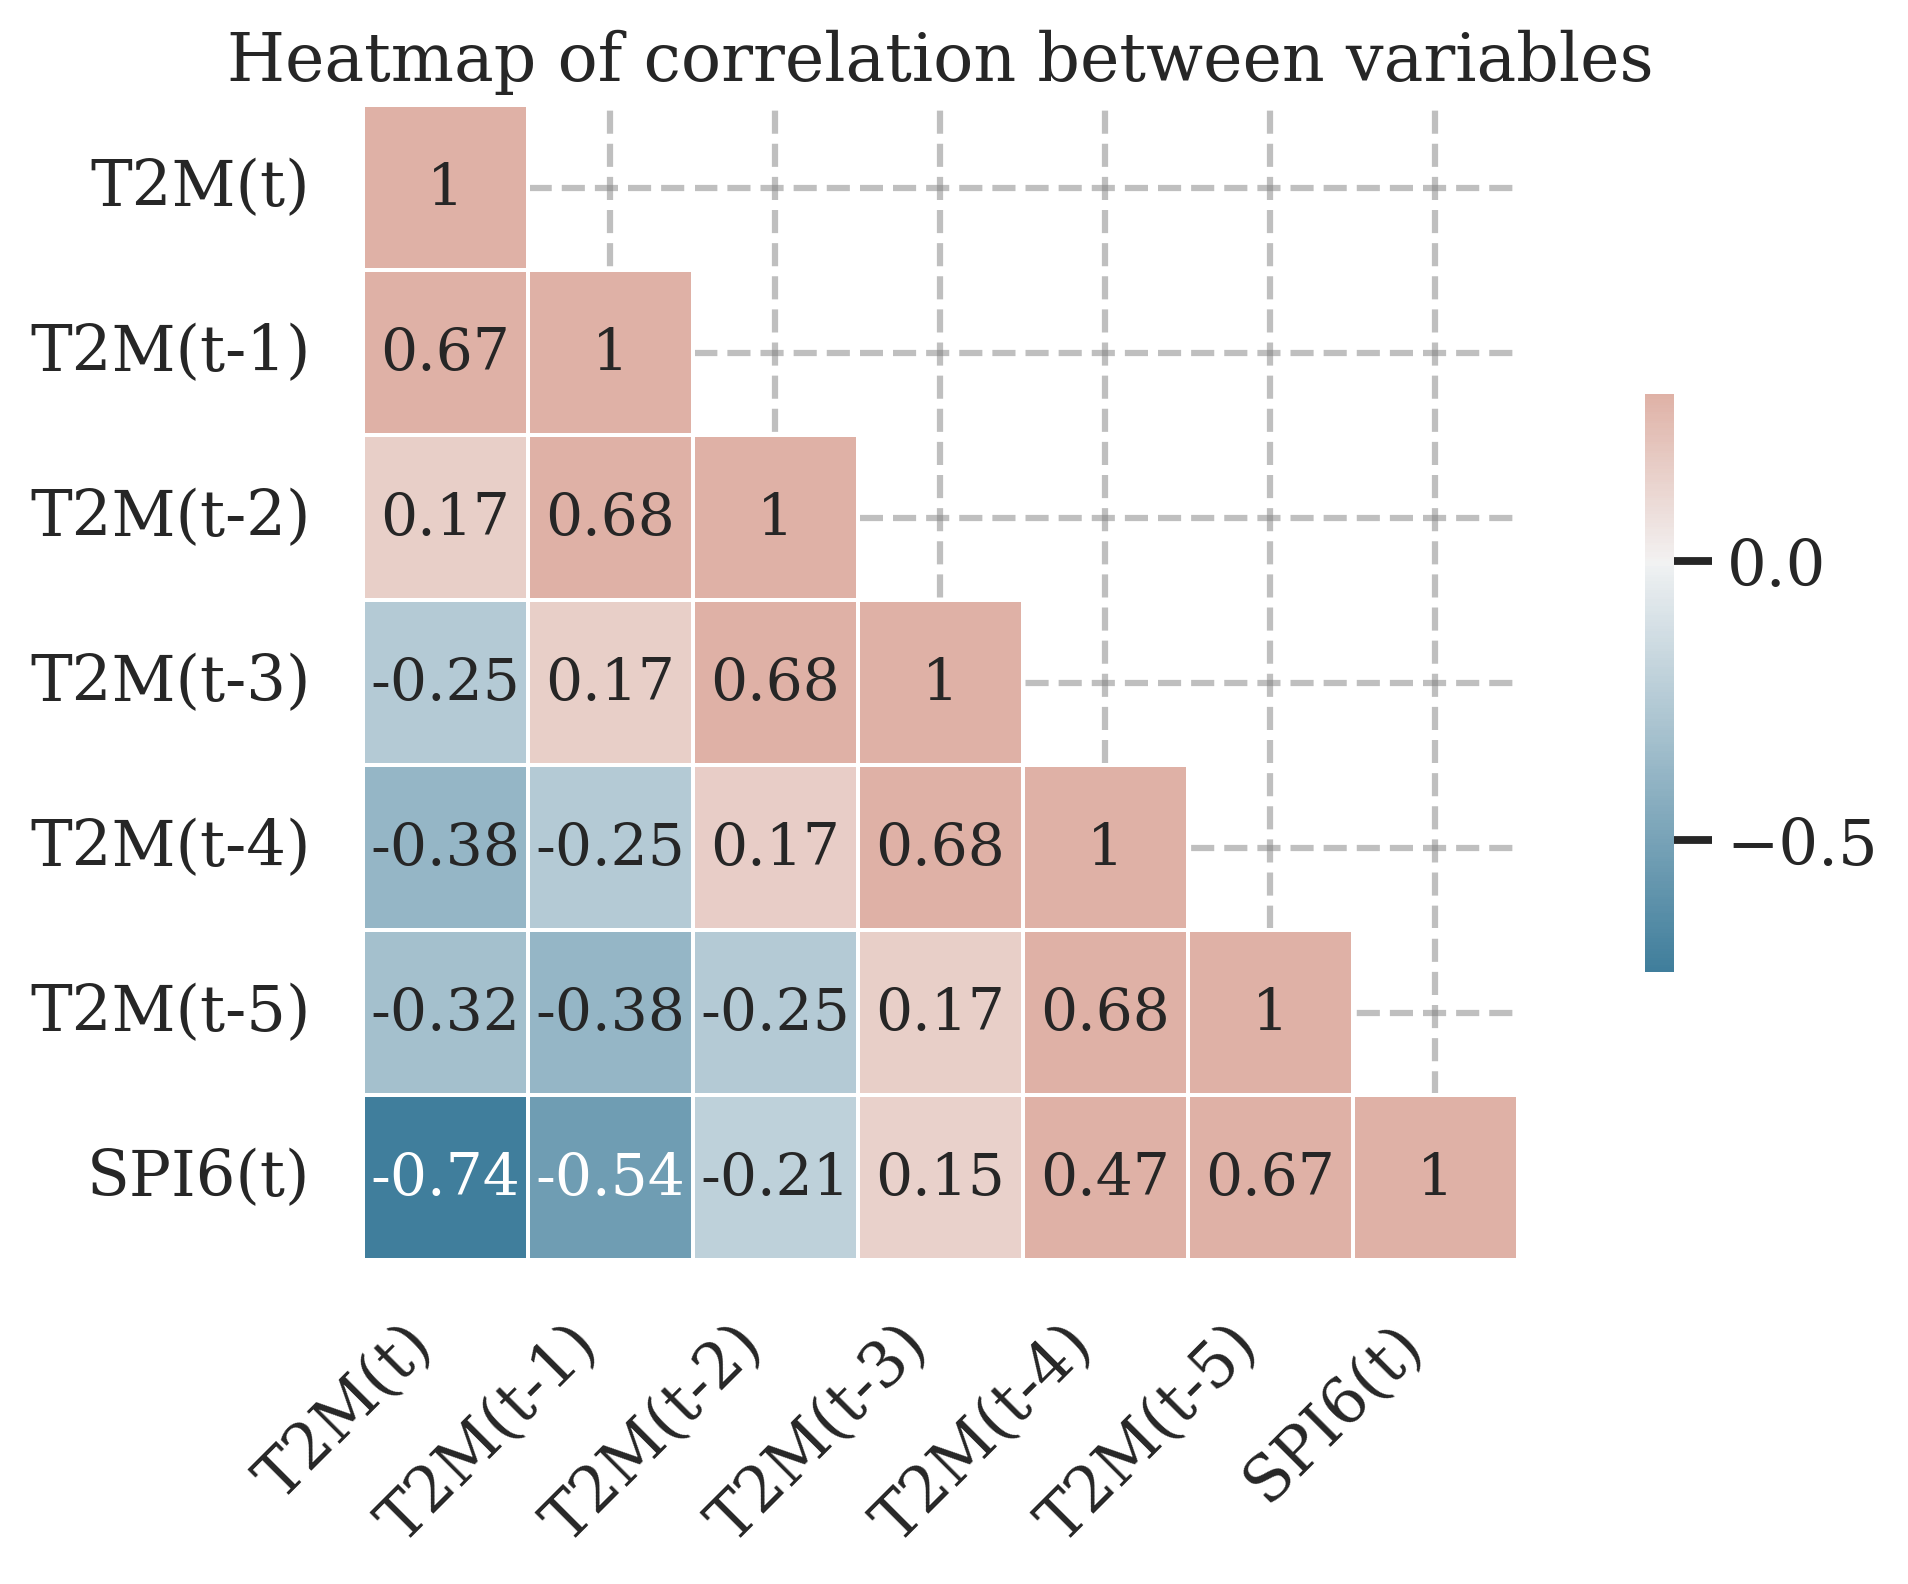

In [39]:
# Compute the correlation matrix : SPI6 and lag T2M

dfm2 = lagged_data[['T2M(t)','T2M(t-1)', 'T2M(t-2)', 'T2M(t-3)','T2M(t-4)', 'T2M(t-5)','SPI6(t)']]

corr = dfm2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [40]:
np.abs(dfm2.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)     1.000000
T2M(t)      0.736118
T2M(t-5)    0.673036
T2M(t-1)    0.536320
T2M(t-4)    0.471039
T2M(t-2)    0.209333
T2M(t-3)    0.154172
Name: SPI6(t), dtype: float64

#### Lag 0 T2M(t)

In [41]:
print(lagged_selected_columns), lagged_selected_columns.append('T2M(t)')

['SPI6(t)', 'PS(t-1)']


(None, None)

In [42]:
lagged_selected_columns

['SPI6(t)', 'PS(t-1)', 'T2M(t)']

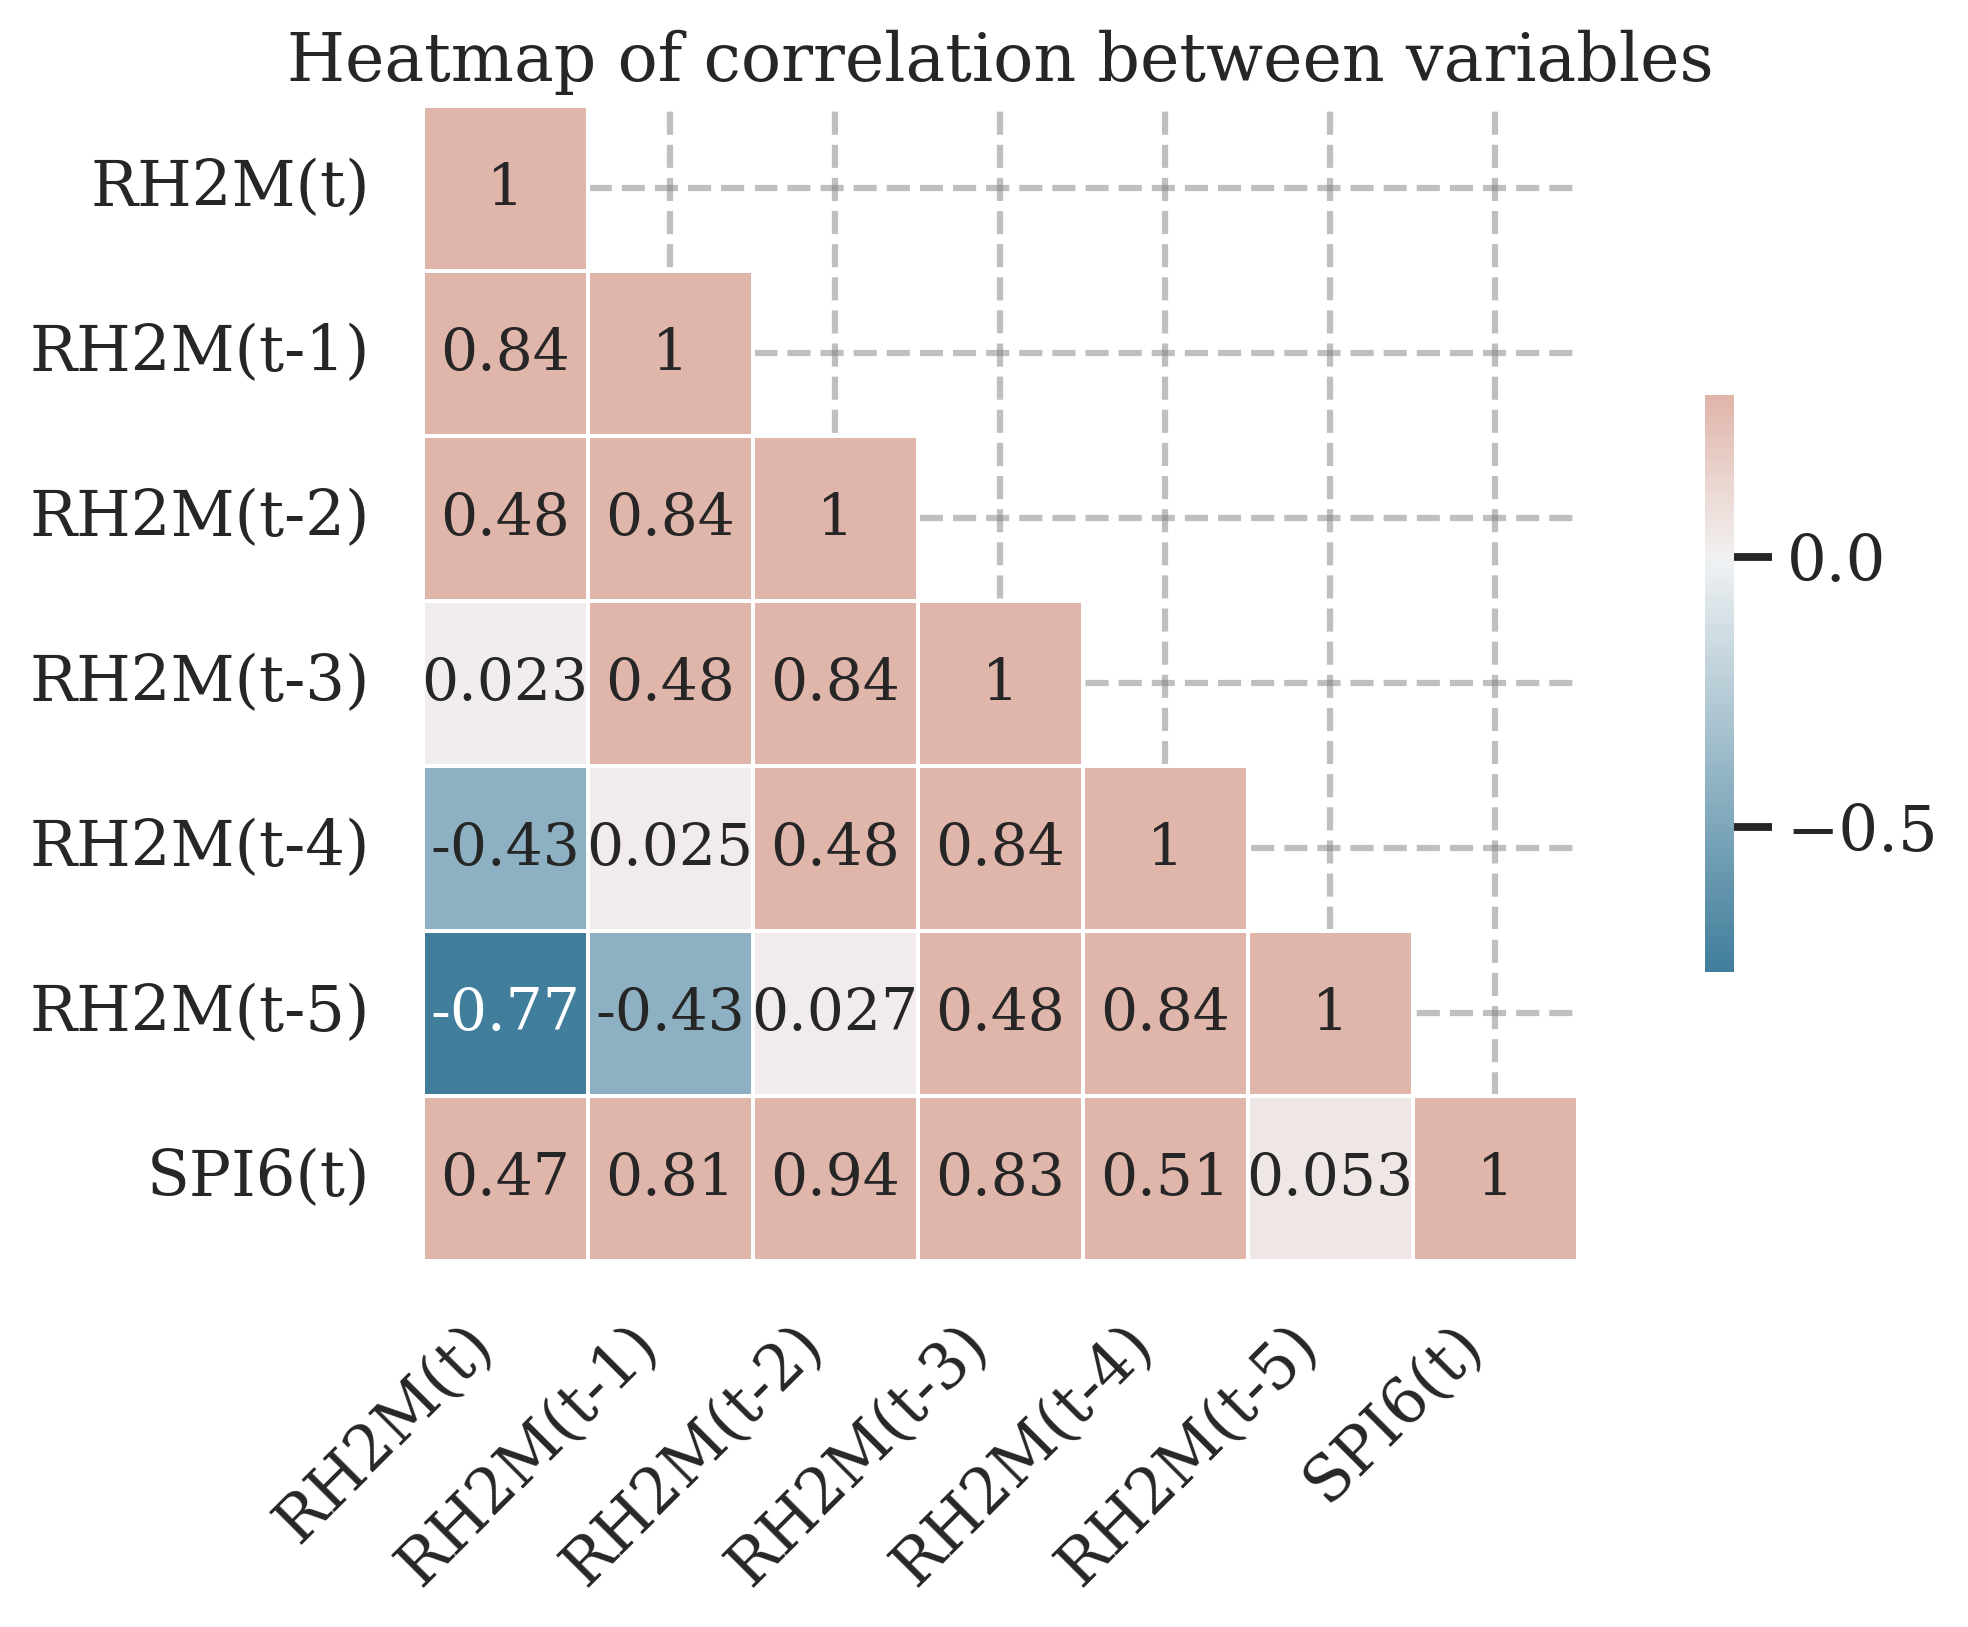

In [43]:
# Compute the correlation matrix : SPI6 and lag RH2M

dfm3 = lagged_data[['RH2M(t)','RH2M(t-1)', 'RH2M(t-2)', 'RH2M(t-3)','RH2M(t-4)', 'RH2M(t-5)','SPI6(t)']]

corr = dfm3.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [44]:
np.abs(dfm3.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
RH2M(t-2)    0.936264
RH2M(t-3)    0.832521
RH2M(t-1)    0.806720
RH2M(t-4)    0.513420
RH2M(t)      0.471563
RH2M(t-5)    0.052640
Name: SPI6(t), dtype: float64

Lag 2 RH2M(t-2)

In [45]:
lagged_selected_columns.append('RH2M(t-2)')

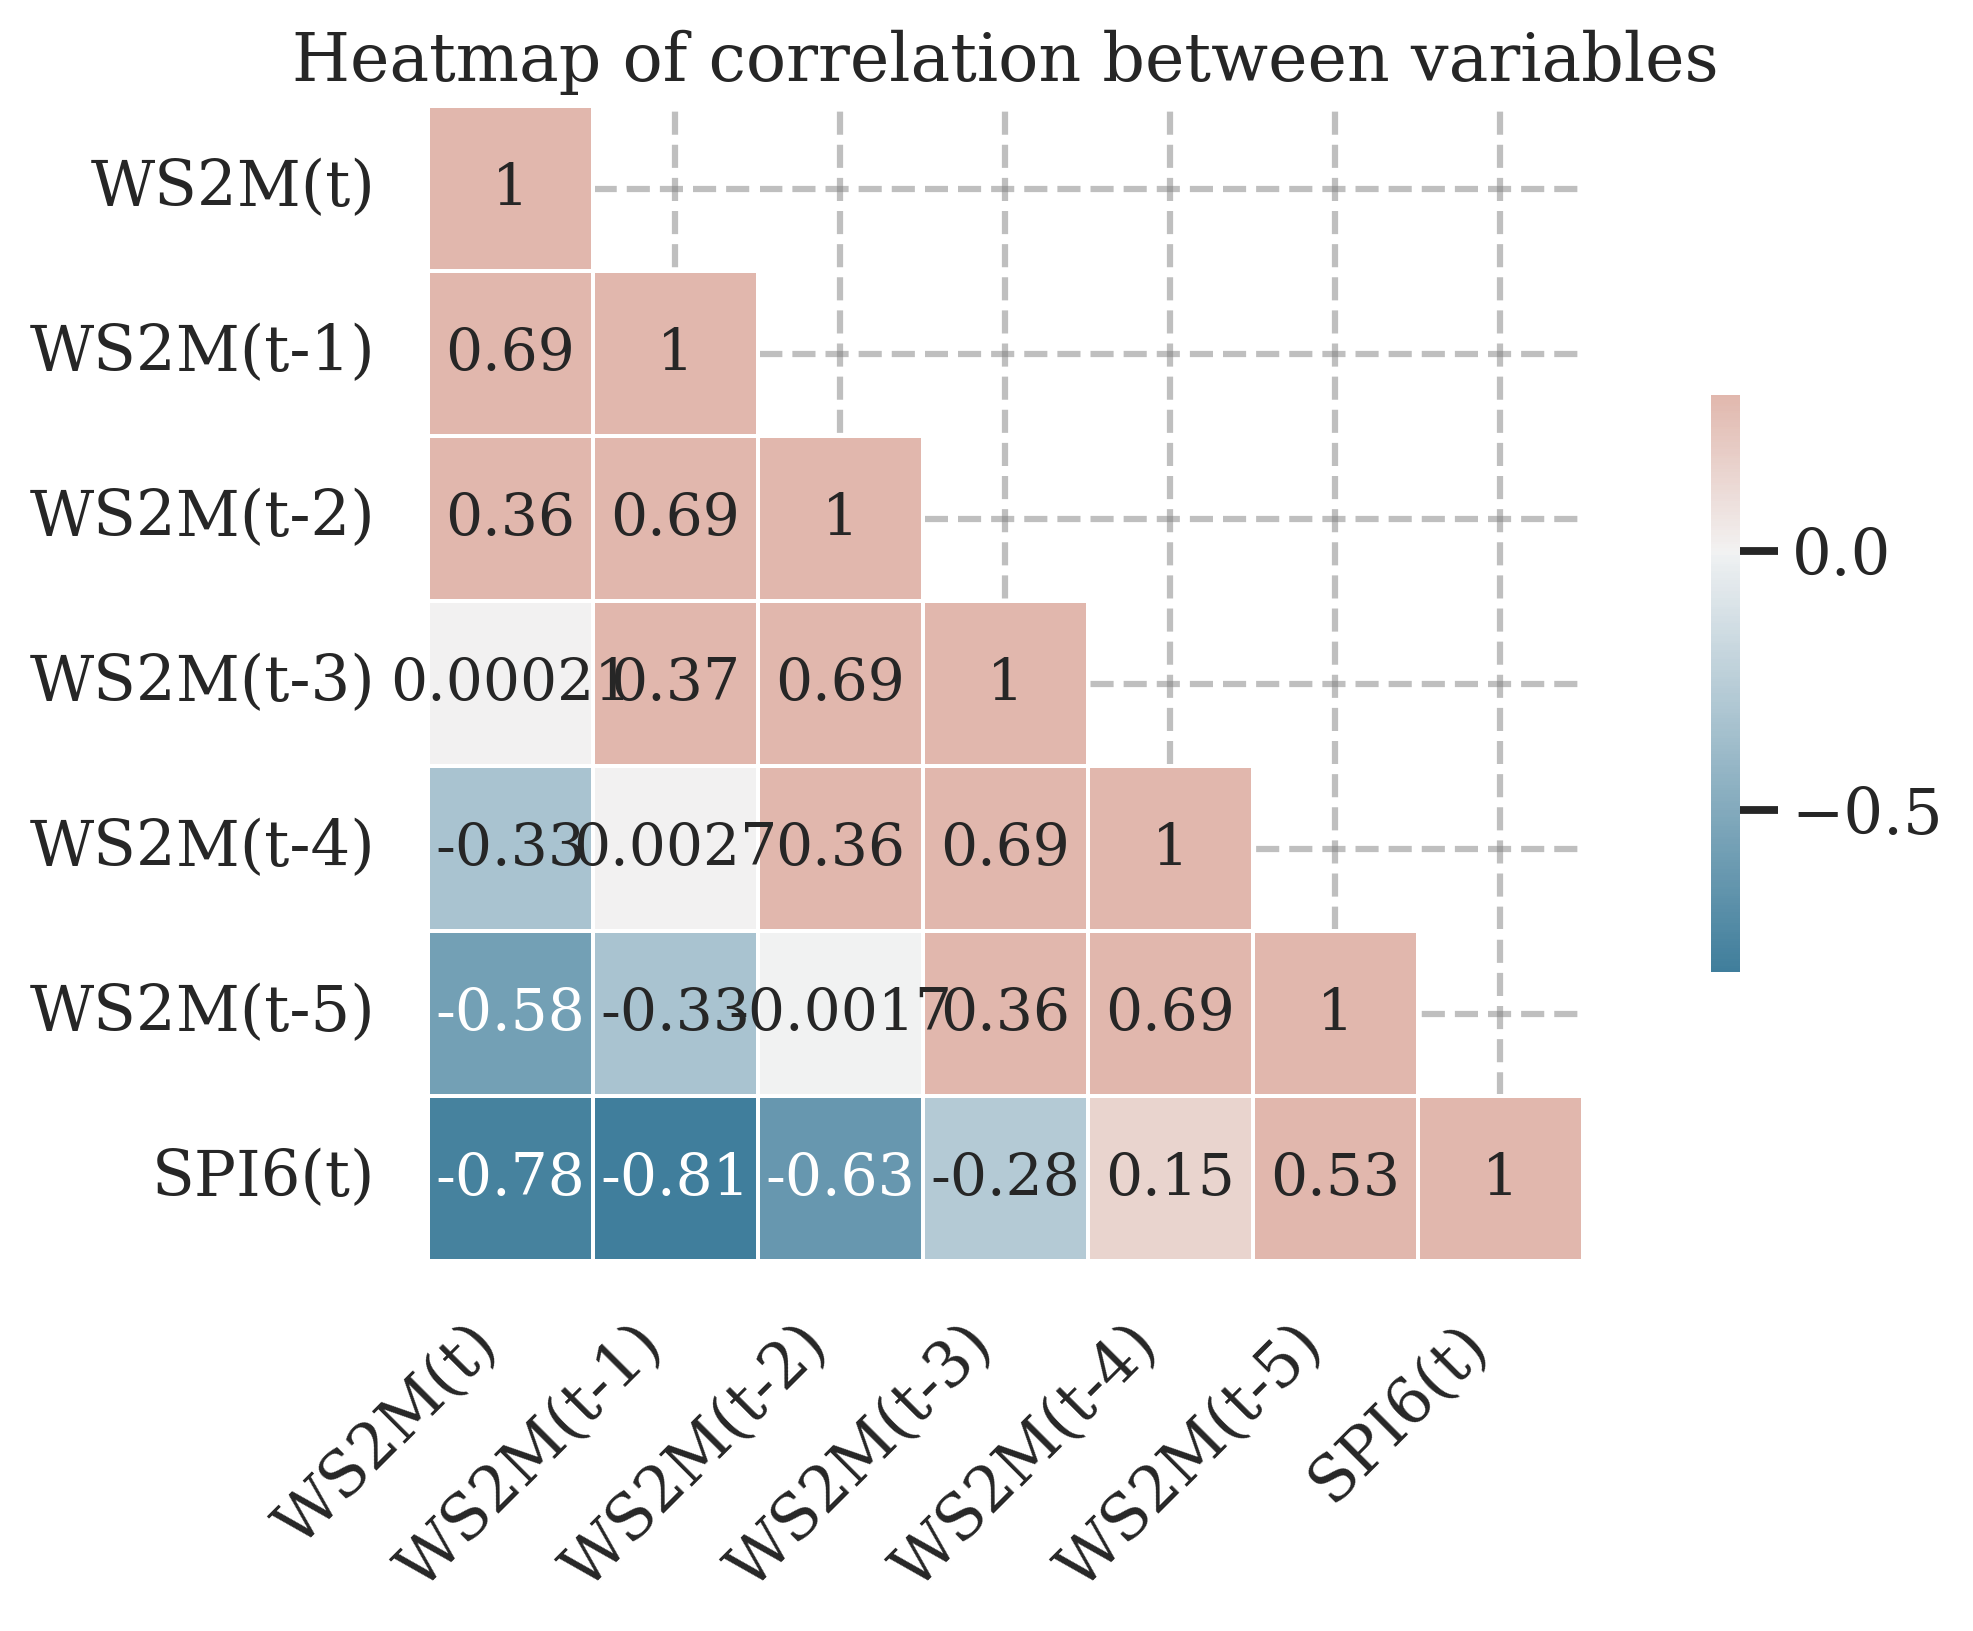

In [46]:
# Compute the correlation matrix : SPI6 and lag WS2M

dfm4 = lagged_data[['WS2M(t)','WS2M(t-1)', 'WS2M(t-2)', 'WS2M(t-3)','WS2M(t-4)', 'WS2M(t-5)','SPI6(t)']]

corr = dfm4.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [47]:
np.abs(dfm4.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
WS2M(t-1)    0.813256
WS2M(t)      0.782138
WS2M(t-2)    0.631639
WS2M(t-5)    0.525437
WS2M(t-3)    0.275815
WS2M(t-4)    0.153691
Name: SPI6(t), dtype: float64

Lag 1 WS2M(t-1)

In [48]:
lagged_selected_columns.append('WS2M(t-1)')

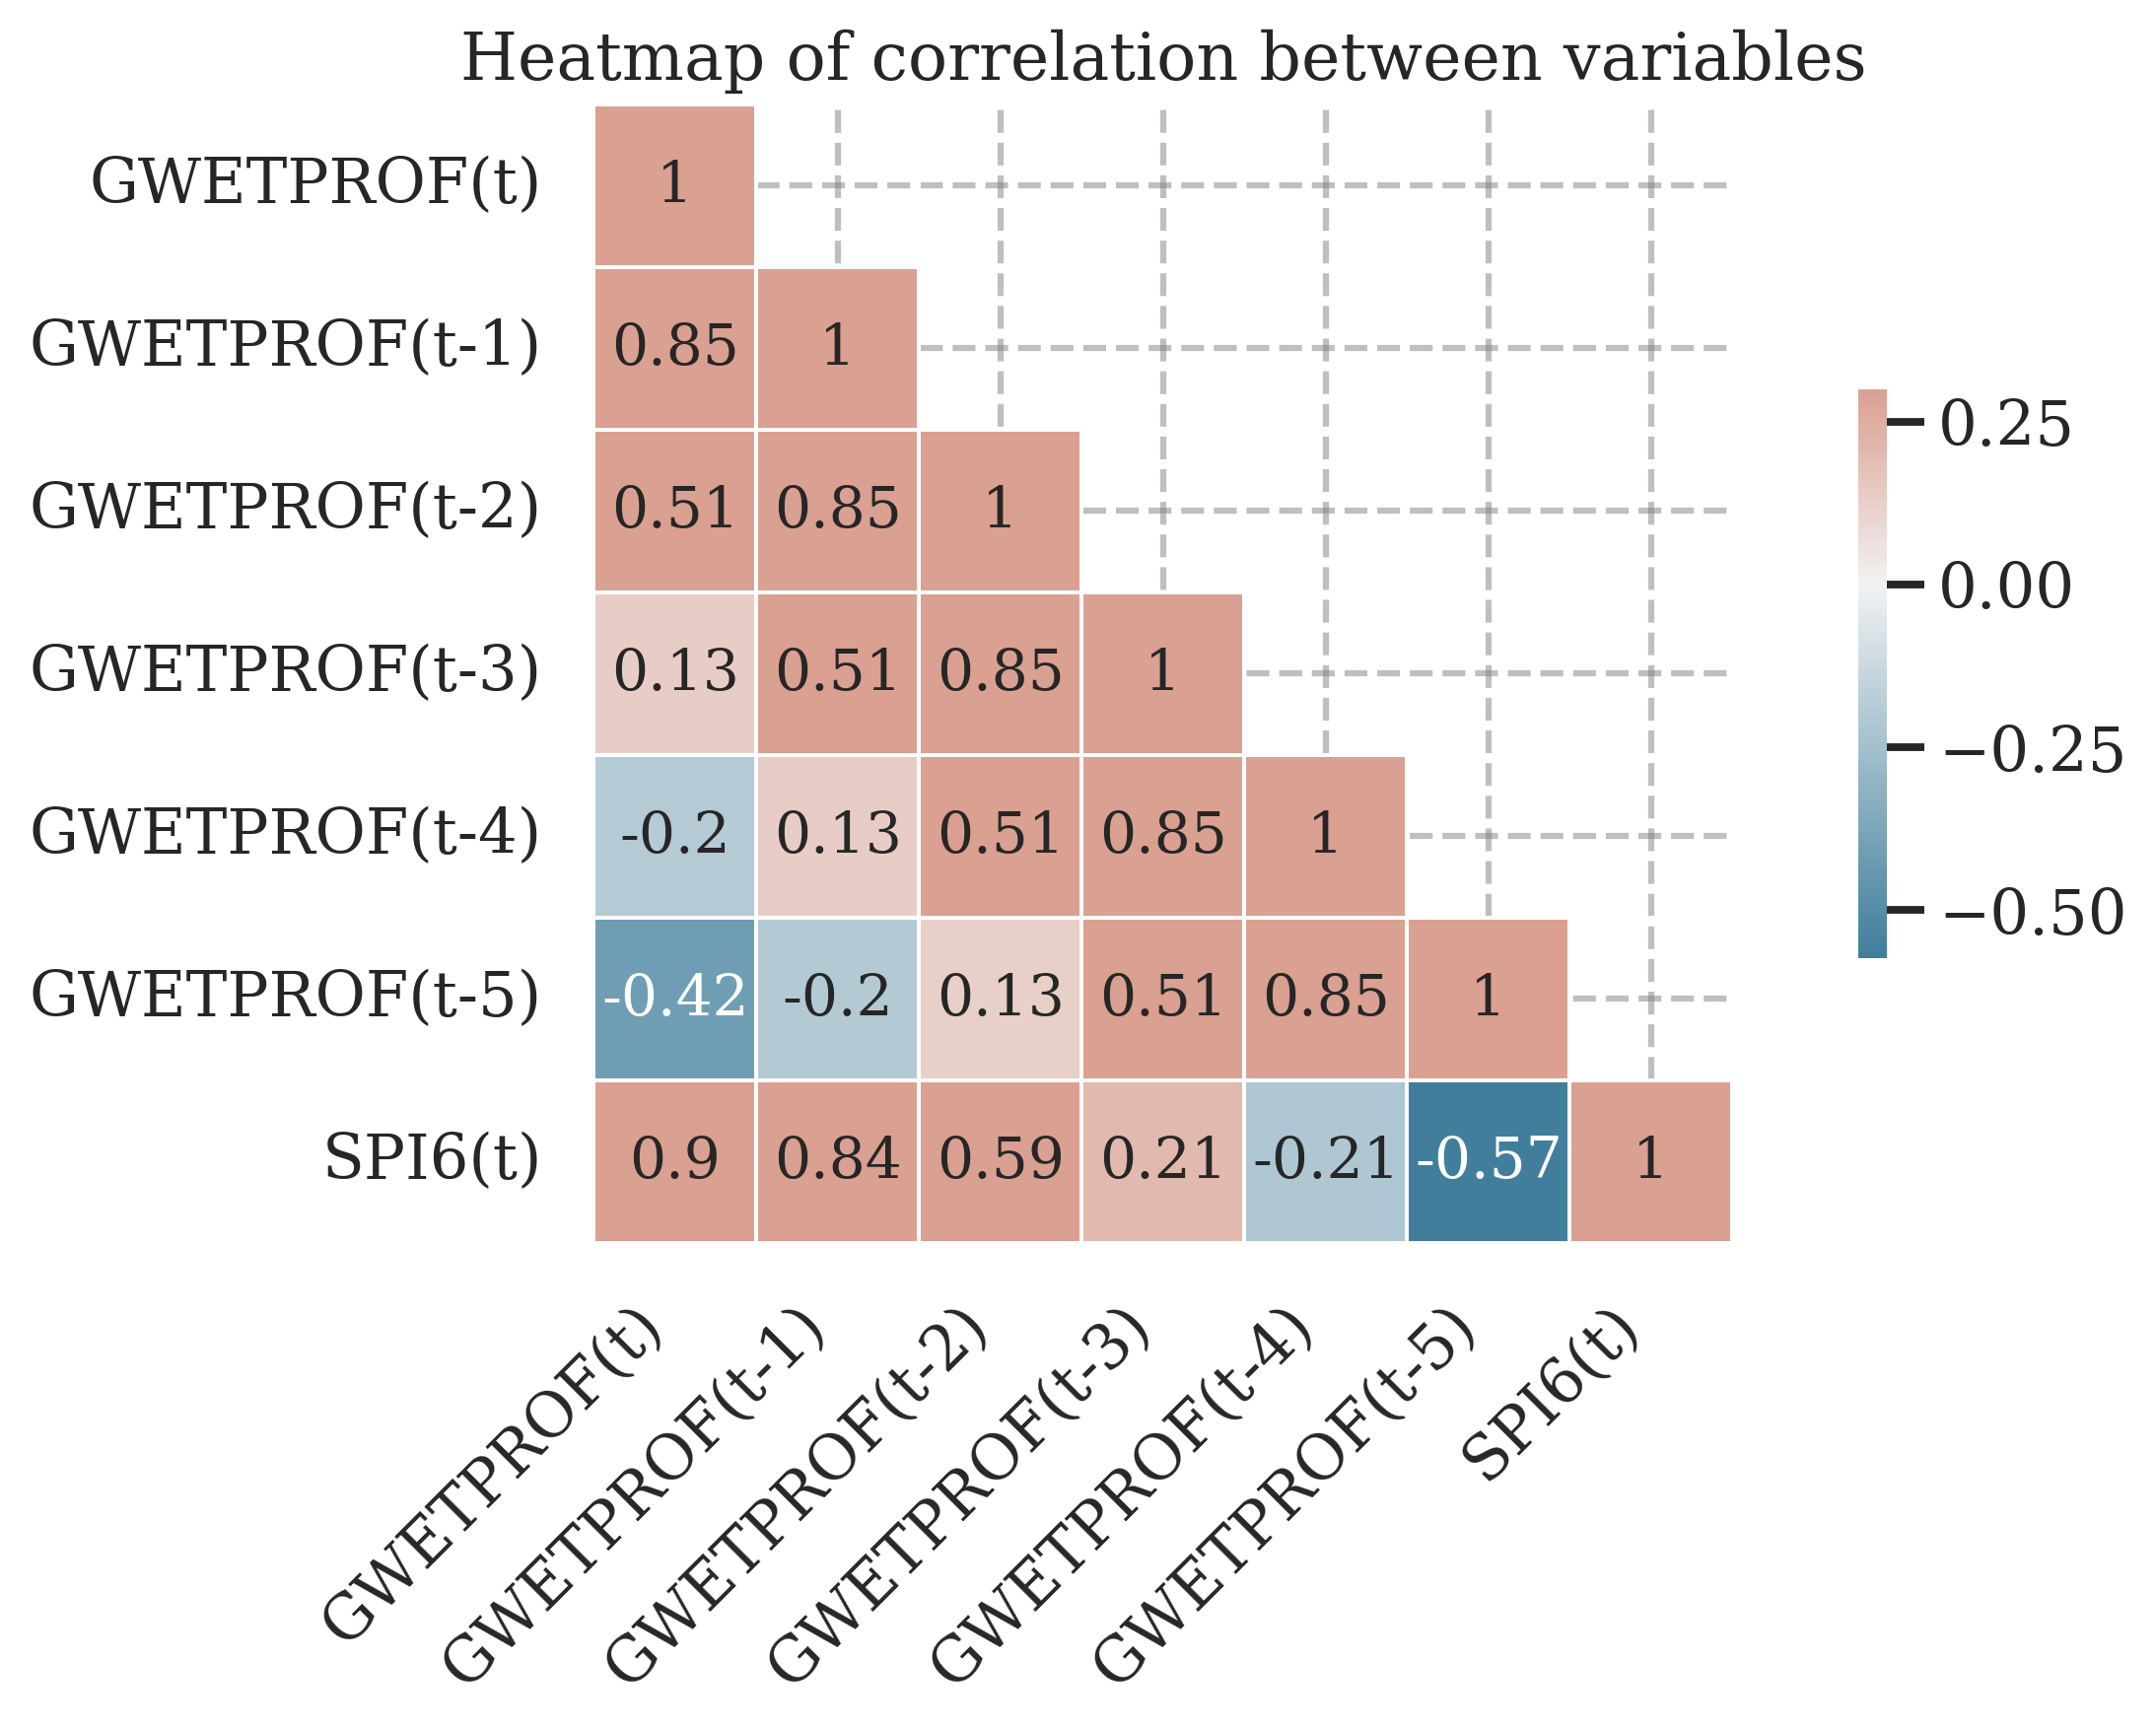

In [49]:
# Compute the correlation matrix : SPI6 and lag GWETPROF

dfm5 = lagged_data[['GWETPROF(t)','GWETPROF(t-1)', 'GWETPROF(t-2)', 'GWETPROF(t-3)','GWETPROF(t-4)', 'GWETPROF(t-5)','SPI6(t)']]

corr = dfm5.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [50]:
np.abs(dfm5.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)          1.000000
GWETPROF(t)      0.903790
GWETPROF(t-1)    0.838934
GWETPROF(t-2)    0.585152
GWETPROF(t-5)    0.573891
GWETPROF(t-4)    0.214417
GWETPROF(t-3)    0.207691
Name: SPI6(t), dtype: float64

Lag 0 GWETPROF(t)

In [51]:
lagged_selected_columns.append('GWETPROF(t)')

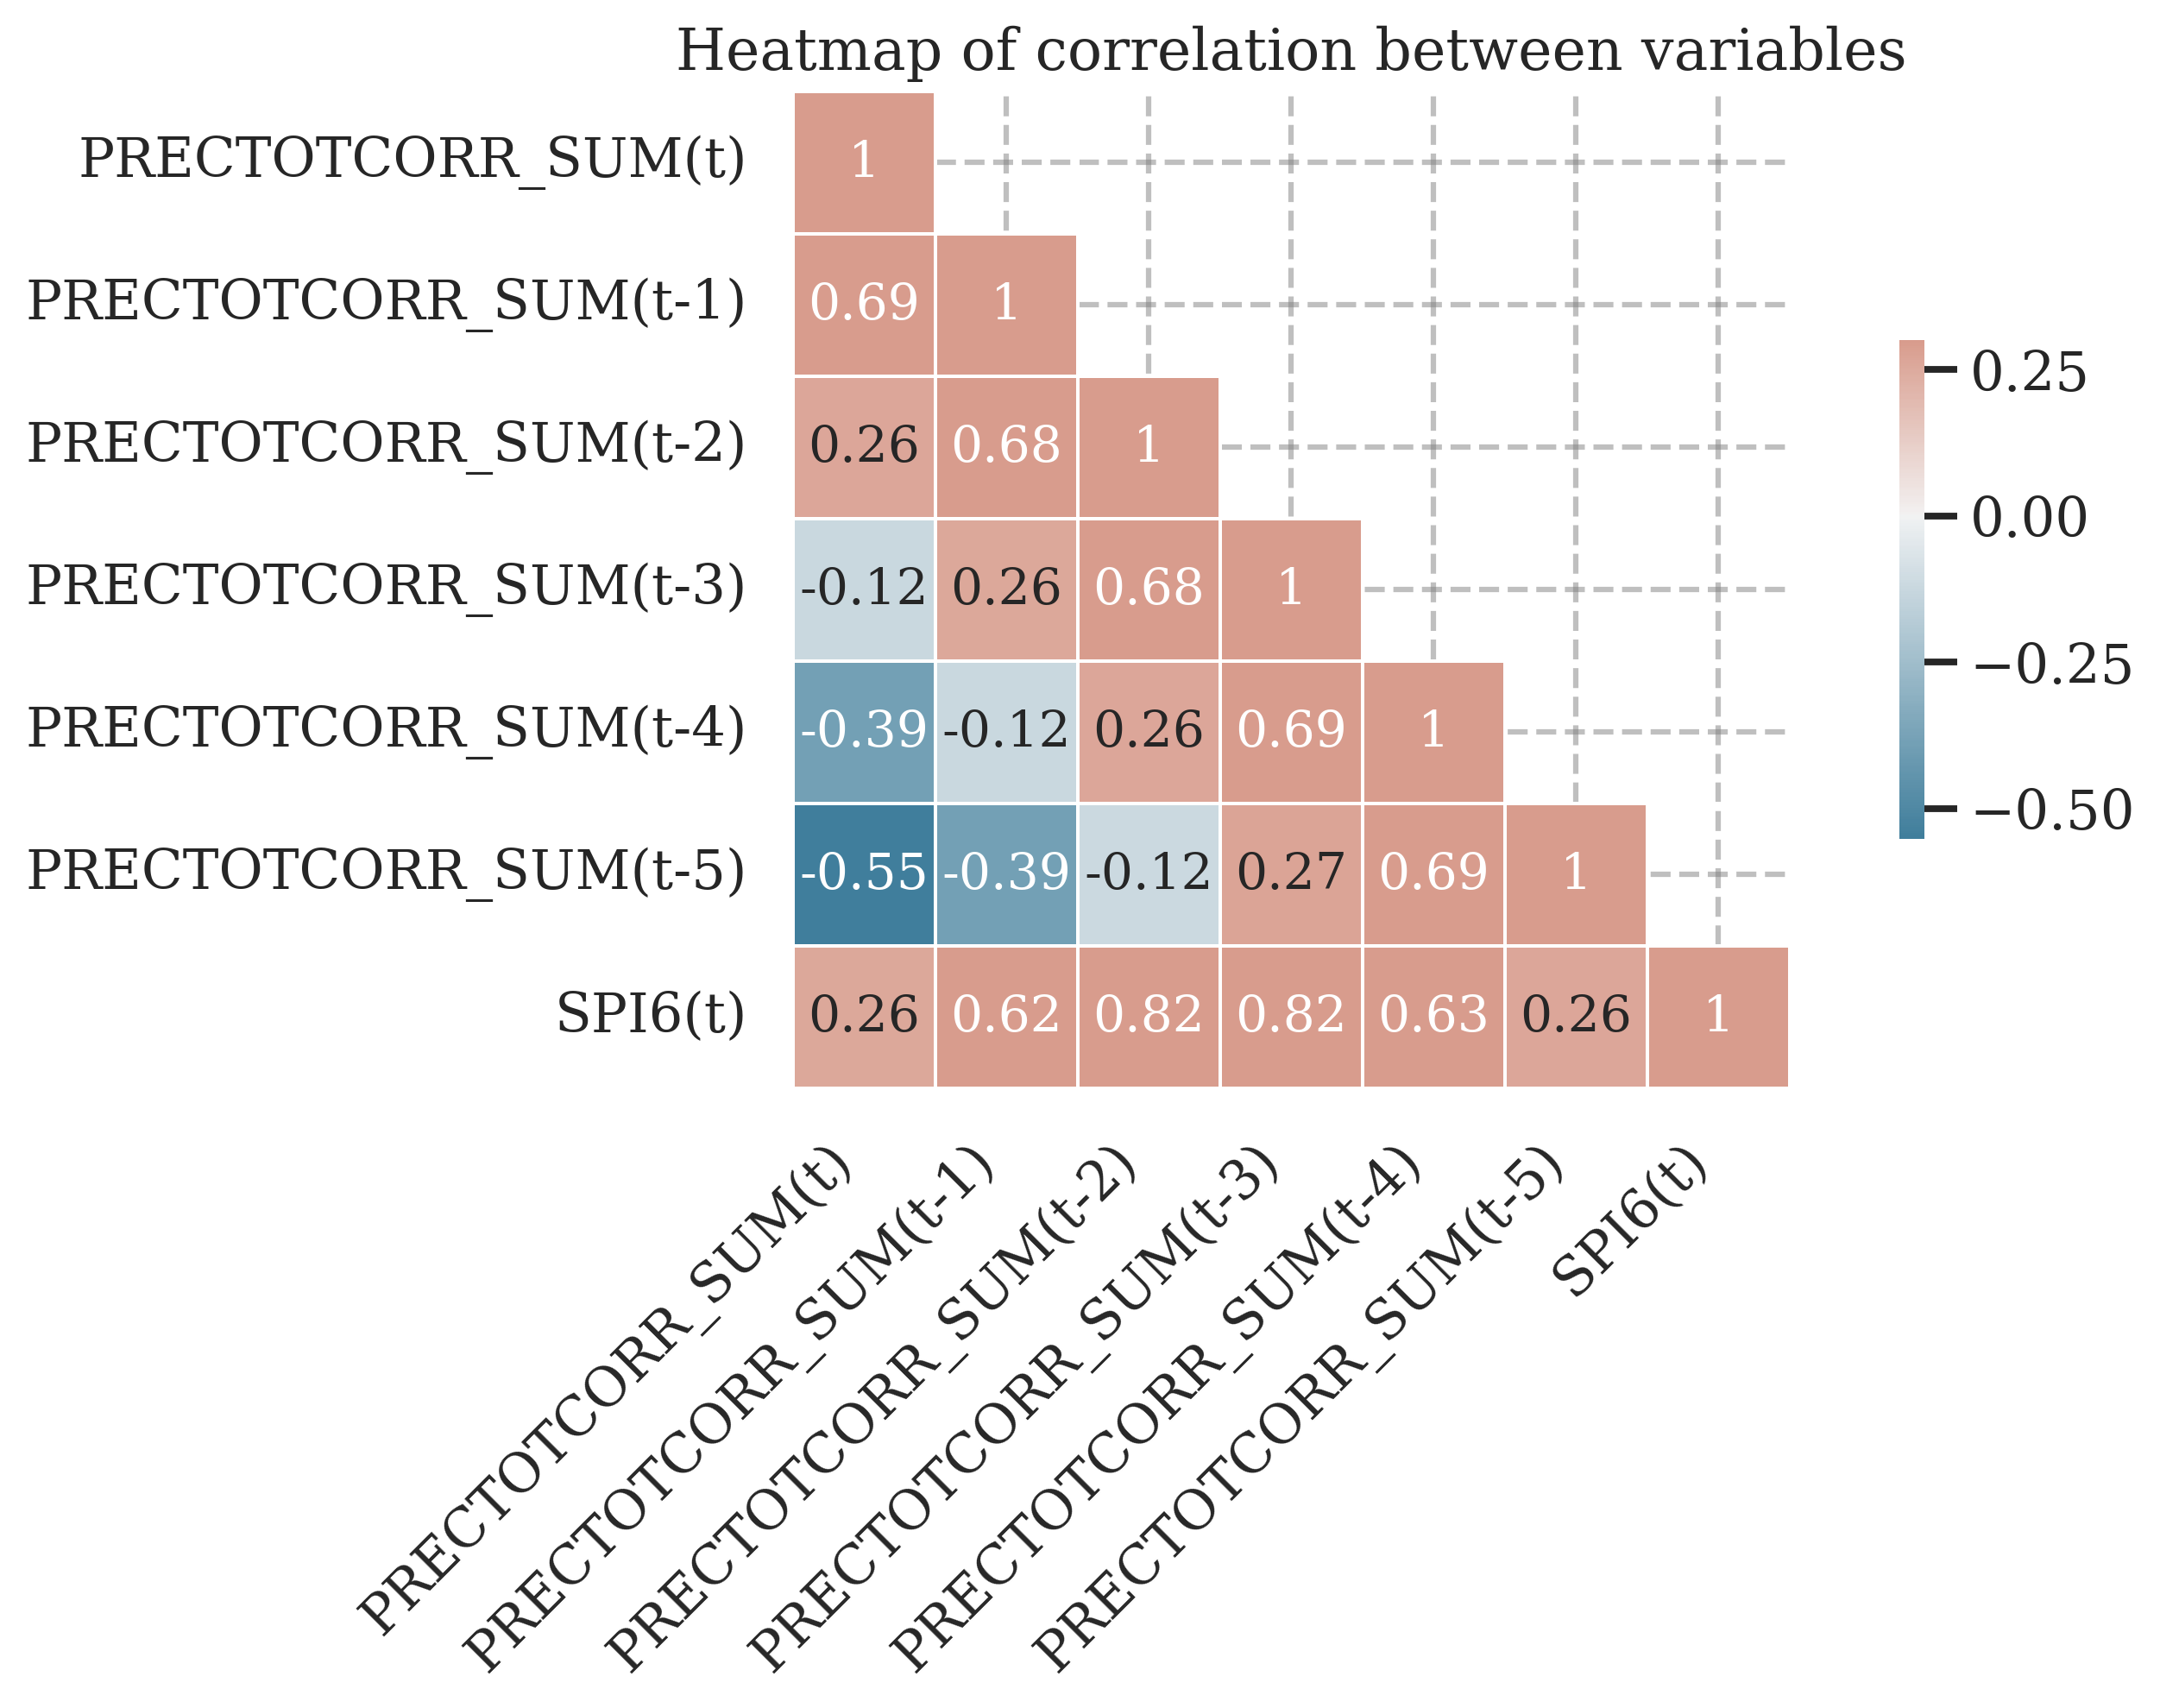

In [52]:
# Compute the correlation matrix : SPI6 and lag PRECTOTCORR_SUM

dfm6 = lagged_data[['PRECTOTCORR_SUM(t)','PRECTOTCORR_SUM(t-1)', 'PRECTOTCORR_SUM(t-2)', 
                    'PRECTOTCORR_SUM(t-3)','PRECTOTCORR_SUM(t-4)', 'PRECTOTCORR_SUM(t-5)','SPI6(t)']]

corr = dfm6.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [53]:
np.abs(dfm6.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)                 1.000000
PRECTOTCORR_SUM(t-3)    0.816476
PRECTOTCORR_SUM(t-2)    0.815426
PRECTOTCORR_SUM(t-4)    0.625482
PRECTOTCORR_SUM(t-1)    0.621133
PRECTOTCORR_SUM(t-5)    0.264824
PRECTOTCORR_SUM(t)      0.259567
Name: SPI6(t), dtype: float64

Lag PRECTOTCORR_SUM(t-3)

In [54]:
lagged_selected_columns.append('PRECTOTCORR_SUM(t-3)')

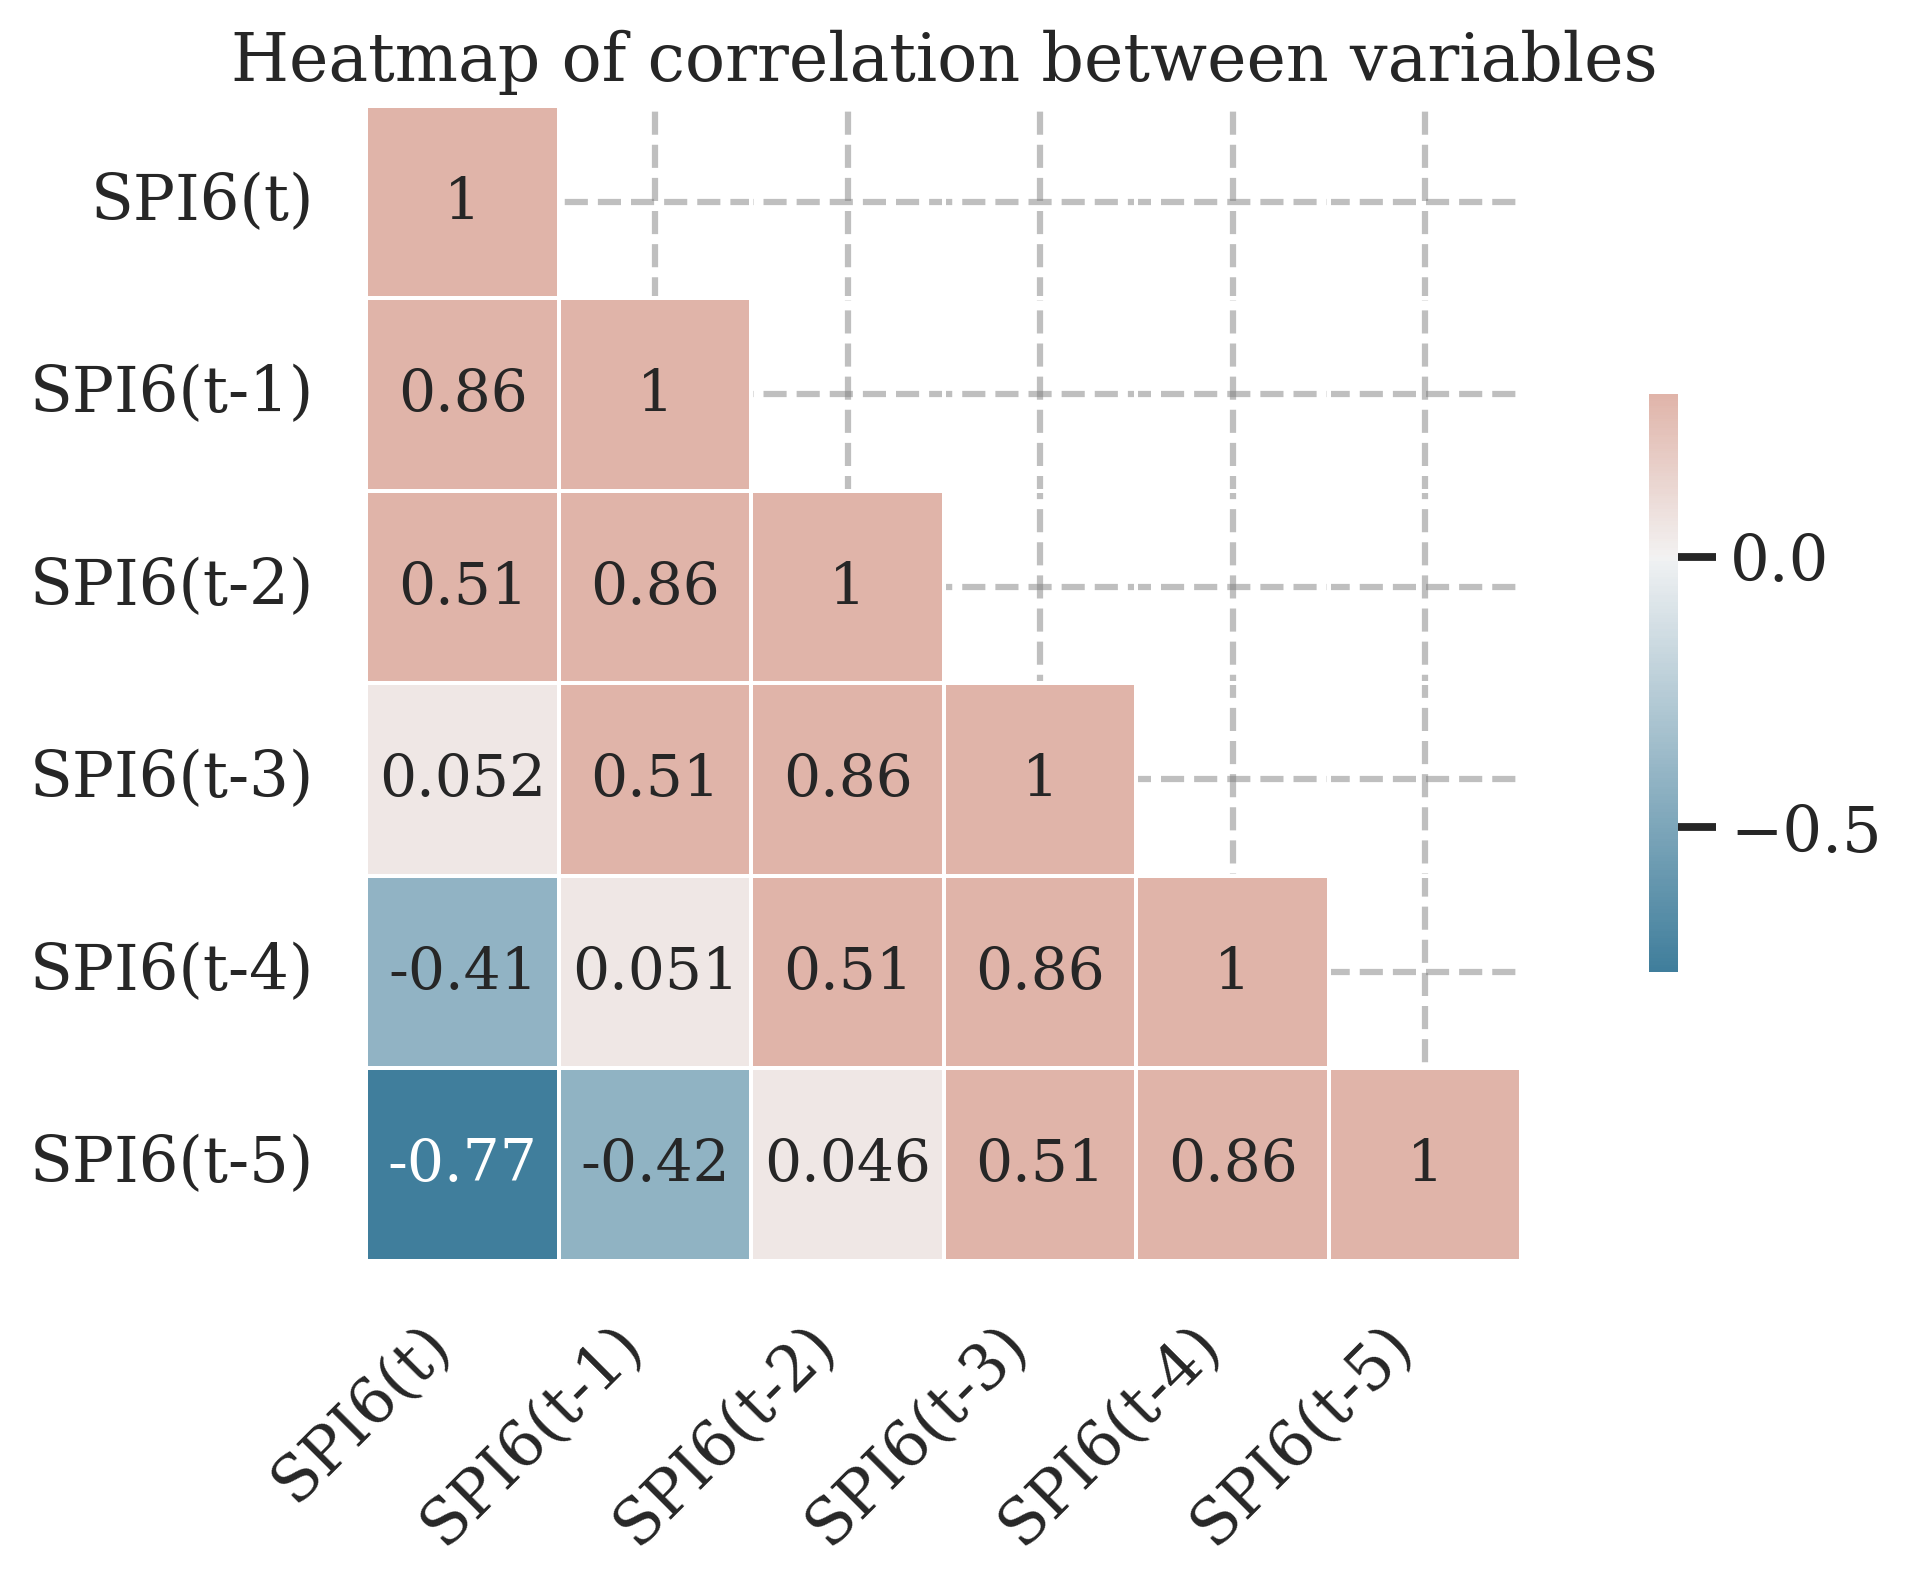

In [55]:
# Compute the correlation matrix : SPI6 and lag SPI6

dfm7 = lagged_data[['SPI6(t)','SPI6(t-1)', 'SPI6(t-2)', 
                    'SPI6(t-3)','SPI6(t-4)', 'SPI6(t-5)']]

corr = dfm7.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [56]:
np.abs(dfm7.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
SPI6(t-1)    0.863026
SPI6(t-5)    0.766931
SPI6(t-2)    0.514543
SPI6(t-4)    0.412537
SPI6(t-3)    0.052462
Name: SPI6(t), dtype: float64

Lag 1 SPI6(t-1)

In [57]:
lagged_selected_columns.append('SPI6(t-1)')

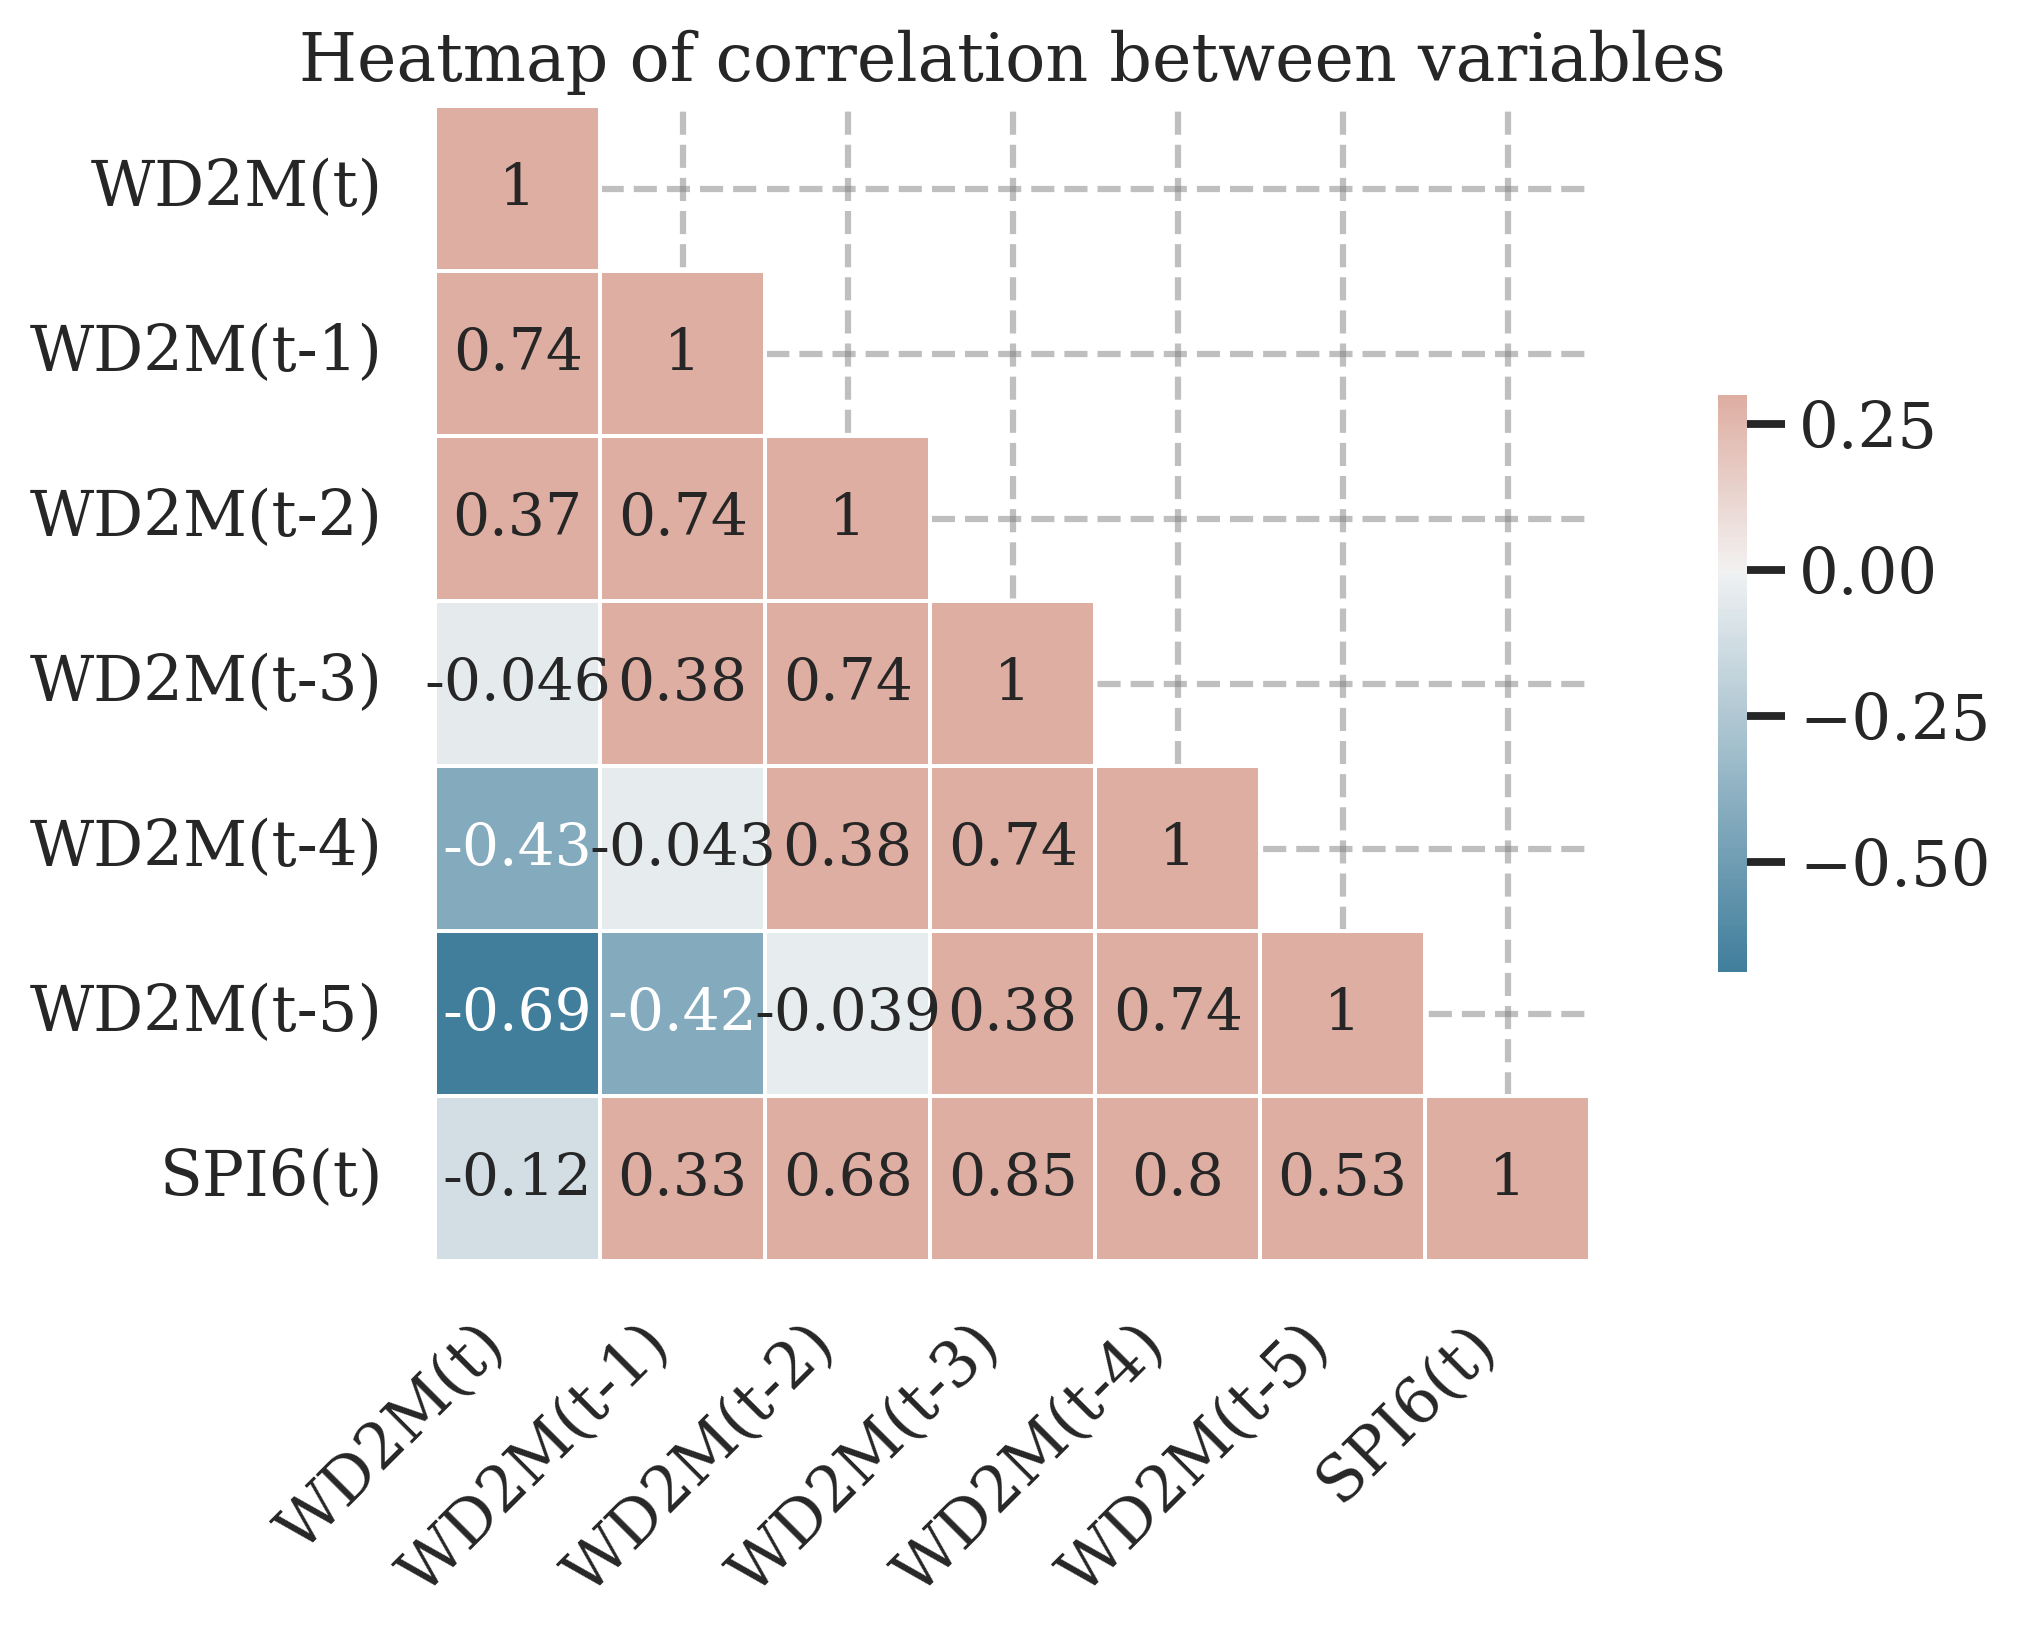

In [58]:
# Compute the correlation matrix : SPI6 and lag SPI6

dfm8 = lagged_data[['WD2M(t)','WD2M(t-1)', 'WD2M(t-2)', 
                    'WD2M(t-3)','WD2M(t-4)', 'WD2M(t-5)', 'SPI6(t)']]
corr = dfm8.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [59]:
np.abs(dfm8.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
WD2M(t-3)    0.847025
WD2M(t-4)    0.798197
WD2M(t-2)    0.678281
WD2M(t-5)    0.526393
WD2M(t-1)    0.331622
WD2M(t)      0.115609
Name: SPI6(t), dtype: float64

In [60]:
lagged_selected_columns.append('WD2M(t-3)')

New dataset by choosing each  new lag

In [61]:
#lagged_selected_columns, 
len(lagged_selected_columns)

9

In [62]:
print(lagged_selected_columns)

['SPI6(t)', 'PS(t-1)', 'T2M(t)', 'RH2M(t-2)', 'WS2M(t-1)', 'GWETPROF(t)', 'PRECTOTCORR_SUM(t-3)', 'SPI6(t-1)', 'WD2M(t-3)']


In [63]:
final_lagged_data = lagged_data[lagged_selected_columns] 

final_lagged_data

,SPI6(t),PS(t-1),T2M(t),RH2M(t-2),WS2M(t-1),GWETPROF(t),PRECTOTCORR_SUM(t-3),SPI6(t-1),WD2M(t-3)
DATE,,,,,,,,,
1981-11-30,1.162991,0.022727,-0.503737,0.909117,-0.755656,-0.230769,-0.025031,1.424039,0.519320
1981-12-31,0.608285,0.181818,-0.473842,0.640534,-0.366516,-0.435897,-0.100028,1.162991,0.467154
1982-01-31,-0.191134,0.181818,-0.437967,0.059814,-0.466063,-0.641026,-1.000000,0.608285,0.206841
1982-02-28,-0.762143,0.068182,-0.168909,-0.306620,0.022624,-0.743590,-1.000000,-0.191134,-0.541230
1982-03-31,-1.333153,-0.159091,0.339312,-0.504646,0.049774,-0.846154,-1.000000,-0.762143,-0.506800
...,...,...,...,...,...,...,...,...,...
2021-08-31,0.923103,0.431818,-0.288490,0.626016,-0.185520,-0.025641,-0.872618,-0.213161,0.289712
2021-09-30,1.489936,0.340909,-0.210762,0.783972,-0.674208,0.538462,-0.133924,0.923103,0.356336
2021-10-31,1.610003,0.272727,-0.038864,0.992451,-0.891403,0.384615,-0.192330,1.489936,0.515594


### Create lags with raw data to prevent data leakage

In [64]:
lagged_data_raw = create_lagged_features(data= data, 
                                      col_names=data.columns,
                                      n_in=data_params['window_size'],
                                      n_out=data_params['n_output_steps'],
                                      dropnan=True)

lagged_data_raw.head()

,PS(t-5),T2M(t-5),RH2M(t-5),WD2M(t-5),WS2M(t-5),GWETPROF(t-5),PRECTOTCORR_SUM(t-5),SPI6(t-5),PS(t-4),T2M(t-4),...,PRECTOTCORR_SUM(t-1),SPI6(t-1),PS(t),T2M(t),RH2M(t),WD2M(t),WS2M(t),GWETPROF(t),PRECTOTCORR_SUM(t),SPI6(t)
DATE,,,,,,,,,,,,,,,,,,,,,
1981-11-30,98.09,27.91,71.31,213.81,2.27,0.47,179.30,-0.435817,98.13,25.41,...,0.00,1.424039,98.07,23.84,54.50,82.50,1.88,0.55,0.00,1.162991
1981-12-31,98.13,25.41,82.81,226.06,2.05,0.55,258.40,0.363602,98.12,25.33,...,0.00,1.162991,98.07,24.04,41.88,87.12,1.77,0.51,0.00,0.608285
1982-01-31,98.12,25.33,83.19,224.81,1.57,0.59,205.66,0.999858,98.13,25.24,...,0.00,0.608285,98.02,24.28,35.06,44.00,2.31,0.47,0.00,-0.191134
1982-02-28,98.13,25.24,83.75,217.81,1.48,0.66,189.84,1.570868,98.00,26.34,...,0.00,-0.191134,97.92,26.08,39.50,81.75,2.34,0.45,21.09,-0.762143
1982-03-31,98.00,26.34,74.50,182.88,1.45,0.62,0.00,1.424039,98.07,23.84,...,21.09,-0.762143,97.82,29.48,38.25,113.38,2.43,0.43,5.27,-1.333153


In [65]:
lagged_data_path = data_params['data_path'] + 'lagged/' + data_params['city'] + '_lagged_raw.csv'
lagged_data_raw[final_lagged_data.columns].to_csv(lagged_data_path)

In [66]:
pd.read_csv('../datasets/lagged/Segbana_lagged_raw.csv')

,DATE,SPI6(t),PS(t-1),T2M(t),RH2M(t-2),WS2M(t-1),GWETPROF(t),PRECTOTCORR_SUM(t-3),SPI6(t-1),WD2M(t-3)
0,1981-11-30,1.162991,98.00,23.84,83.75,1.45,0.55,205.66,1.424039,224.81
1,1981-12-31,0.608285,98.07,24.04,74.50,1.88,0.51,189.84,1.162991,217.81
2,1982-01-31,-0.191134,98.07,24.28,54.50,1.77,0.47,0.00,0.608285,182.88
3,1982-02-28,-0.762143,98.02,26.08,41.88,2.31,0.45,0.00,-0.191134,82.50
4,1982-03-31,-1.333153,97.92,29.48,35.06,2.34,0.43,0.00,-0.762143,87.12
...,...,...,...,...,...,...,...,...,...,...
477,2021-08-31,0.923103,98.18,25.28,74.00,2.08,0.59,26.87,-0.213161,194.00
478,2021-09-30,1.489936,98.14,25.80,79.44,1.54,0.70,182.69,0.923103,202.94
479,2021-10-31,1.610003,98.11,26.95,86.62,1.30,0.67,170.37,1.489936,224.31
480,2021-11-30,1.533279,98.01,26.04,84.38,1.27,0.60,367.28,1.610003,228.44


In [67]:
pd.read_csv('../datasets/lagged/Segbana_lagged_raw.csv').describe()

,SPI6(t),PS(t-1),T2M(t),RH2M(t-2),WS2M(t-1),GWETPROF(t),PRECTOTCORR_SUM(t-3),SPI6(t-1),WD2M(t-3)
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,-0.008138,97.997925,27.137075,57.421535,2.040228,0.494751,76.082282,-0.007192,155.533693
std,0.999117,0.146897,2.673824,20.413121,0.457924,0.079852,95.014073,1.000258,65.644194
min,-1.414703,97.550000,20.520000,18.000000,1.180000,0.400000,0.000000,-1.414703,20.940000
25%,-0.941579,97.900000,25.480000,39.500000,1.660000,0.430000,0.000000,-0.941579,82.547500
50%,0.004684,98.030000,26.375000,58.065000,2.020000,0.470000,26.370000,0.004684,190.060000
75%,0.853030,98.100000,29.145000,77.847500,2.410000,0.540000,147.660000,0.853030,212.105000
max,2.305009,98.430000,33.900000,86.880000,3.390000,0.790000,421.880000,2.305009,289.310000
